# TRỰC QUAN HÓA DỮ LIỆU

## Import thư viện

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

## Đọc dữ liệu

In [126]:
df = pd.read_csv("feature_engineering.csv")

### Kiểm tra nhanh dữ liệu

In [ ]:
df.info()  # Thông tin về dữ liệu
distinct_counts = df.nunique()
display(distinct_counts)
display(df.describe())  # Thống kê tổng quan
display(df.head())  # Xem trước vài dòng


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    1194 non-null   object 
 1   url                     1194 non-null   object 
 2   price                   1194 non-null   int64  
 3   chipset                 1194 non-null   object 
 4   ram                     1194 non-null   int64  
 5   internal_memory         1194 non-null   int64  
 6   screen_size             1194 non-null   float64
 7   screen_resolution       1194 non-null   object 
 8   screen_tech             1194 non-null   object 
 9   refresh_rate            1194 non-null   float64
 10  camera_main_resolution  1194 non-null   int64  
 11  camera_count            1194 non-null   int64  
 12  battery_capacity        1194 non-null   int64  
 13  security                1194 non-null   object 
 14  cpu                     1194 non-null   

name                      1167
url                       1194
price                      406
chipset                    494
ram                          9
internal_memory              8
screen_size                 78
screen_resolution           92
screen_tech                 99
refresh_rate                 7
camera_main_resolution      17
camera_count                 6
battery_capacity           122
security                     4
cpu                        494
brand                       21
os                           2
price_segment                3
price_category               4
screen_width                46
screen_height               77
screen_resolution_k          4
total_pixels                92
aspect_ratio                77
chip_model                 208
dtype: int64

,price,ram,internal_memory,screen_size,refresh_rate,camera_main_resolution,camera_count,battery_capacity,screen_width,screen_height,total_pixels,aspect_ratio
count,1.194000e+03,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1.194000e+03,1194.000000
mean,9.869250e+06,10.019263,355.679229,6.642140,106.319095,56.827471,2.621441,4947.381072,1111.172529,2404.648241,2.743727e+06,0.463024
std,7.902256e+06,4.162516,284.684061,0.291486,27.453190,34.299657,0.802809,704.014776,240.262284,411.296430,9.182296e+05,0.077401
min,7.500000e+05,2.000000,16.000000,5.000000,60.000000,8.000000,1.000000,2815.000000,240.000000,1080.000000,2.592000e+05,0.222222
25%,4.312500e+06,8.000000,128.000000,6.550000,90.000000,50.000000,2.000000,4600.000000,1080.000000,2340.000000,2.527200e+06,0.449853
50%,7.225000e+06,8.000000,256.000000,6.670000,120.000000,50.000000,3.000000,5000.000000,1080.000000,2400.000000,2.592000e+06,0.450000
75%,1.268000e+07,12.000000,512.000000,6.748750,120.000000,64.000000,3.000000,5030.000000,1220.000000,2640.000000,3.304800e+06,0.454676
max,5.125000e+07,24.000000,1024.000000,8.700000,240.000000,200.000000,6.000000,7600.000000,2880.000000,3840.000000,6.312960e+06,1.777778


,name,url,price,chipset,ram,internal_memory,screen_size,screen_resolution,screen_tech,refresh_rate,...,brand,os,price_segment,price_category,screen_width,screen_height,screen_resolution_k,total_pixels,aspect_ratio,chip_model
0,ASUS ROG Phone 6 12GB 256GB,https://cellphones.com.vn/asus-rog-phone-6-12g...,14490000,Qualcomm Snapdragon 8 thế hệ 1,12,256,6.78,1080 x 2448,AMOLED,60.0,...,Asus,Android,High,High,1080.0,2448.0,HD,2643840.0,0.441176,Snapdragon 8
1,Asus ROG Phone 2,https://mobilecity.vn/asus/asus-rog-phone-2.html,11950000,Qualcomm SM8150 Snapdragon 855 8 nhân GPU Adre...,12,1024,6.59,1080 x 2340,AMOLED,120.0,...,Asus,Android,High,High,1080.0,2340.0,HD,2527200.0,0.461538,Snapdragon 855
2,Asus ROG Phone 3 Elite,https://mobilecity.vn/asus/asus-rog-phone-3-st...,10750000,Qualcomm SM8250 Snapdragon 865,12,256,6.59,1080 x 2340,AMOLED,144.0,...,Asus,Android,High,High,1080.0,2340.0,HD,2527200.0,0.461538,Snapdragon 865
3,Asus ROG Phone 3 Tencent,https://mobilecity.vn/asus/asus-rog-phone-3.html,11450000,Qualcomm SM8250 Snapdragon 865 8 nhân GPU Adre...,16,512,6.59,1080 x 2340,AMOLED,144.0,...,Asus,Android,High,High,1080.0,2340.0,HD,2527200.0,0.461538,Snapdragon 865
4,Asus ROG Phone 5S,https://mobilecity.vn/asus/asus-rog-phone-5s.html,14450000,Qualcomm SM8350 Snapdragon 888 5G 8 nhân GPU A...,16,512,6.78,1080 x 2448,AMOLED,144.0,...,Asus,Android,High,High,1080.0,2448.0,HD,2643840.0,0.441176,Snapdragon 888


## Xử lý dữ liệu

In [133]:
# Chuyển các cột số sang dạng numeric
numeric_features = [
    'price', 'screen_size',
    'camera_main_resolution', 'battery_capacity'
]

numeric_like_categorical = [
    'ram', 'internal_memory', 'camera_count', 'refresh_rate',
]
for col in numeric_features + numeric_like_categorical:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Loại bỏ dòng có dữ liệu thiếu
df = df.dropna(subset=numeric_features)

# Kiểm tra lại
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    1194 non-null   object 
 1   url                     1194 non-null   object 
 2   price                   1194 non-null   int64  
 3   chipset                 1194 non-null   object 
 4   ram                     1194 non-null   int64  
 5   internal_memory         1194 non-null   int64  
 6   screen_size             1194 non-null   float64
 7   screen_resolution       1194 non-null   object 
 8   screen_tech             1194 non-null   object 
 9   refresh_rate            1194 non-null   float64
 10  camera_main_resolution  1194 non-null   int64  
 11  camera_count            1194 non-null   int64  
 12  battery_capacity        1194 non-null   int64  
 13  security                1194 non-null   object 
 14  cpu                     1194 non-null   

## Encoding

In [148]:
data_encode = df.copy()
# Giữ lại top 20 giá trị phổ biến nhất, gộp các giá trị còn lại thành "Other"
top_screen_tech = data_encode['screen_tech'].value_counts().nlargest(20).index
data_encode['screen_tech_grouped'] = data_encode['screen_tech'].apply(lambda x: x if x in top_screen_tech else 'Other')

# One-Hot Encoding cho biến screen_Tech sau khi gộp
data_encode = pd.get_dummies(data_encode, columns=['screen_tech_grouped'], drop_first=True)
# One-Hot Encoding cho biến screen_resolution_k
data_encode = pd.get_dummies(data_encode, columns=['screen_resolution_k'], drop_first=True)
top_brand = data_encode['brand'].value_counts().nlargest(10).index
# Giữ lại top 10 giá trị phổ biến nhất, gộp các giá trị còn lại thành "Other"
data_encode['brand'] = data_encode['brand'].apply(lambda x: x if x in top_brand else 'Other')
# One-Hot Encoding cho biến brand sau khi gộp
data_encode = pd.get_dummies(data_encode, columns=['brand'], drop_first=True)
# Giữ lại top 20 chip_model phổ biến nhất, gộp các giá trị còn lại thành "Other"
top_chip_model = data_encode['chip_model'].value_counts().nlargest(10).index
data_encode['chip_model_grouped'] = data_encode['chip_model'].apply(lambda x: x if x in top_chip_model else 'Other')

# One-Hot Encoding cho biến chip_model sau khi gộp
data_encode = pd.get_dummies(data_encode, columns=['chip_model_grouped'], drop_first=True)

display(data_encode.head())  # Xem trước vài dòng sau khi mã hóa

,name,url,price,chipset,ram,internal_memory,screen_size,screen_resolution,screen_tech,refresh_rate,...,chip_model_grouped_Helio G85,chip_model_grouped_Helio G99,chip_model_grouped_Other,chip_model_grouped_Snapdragon 680,chip_model_grouped_Snapdragon 695,chip_model_grouped_Snapdragon 8 e,chip_model_grouped_Snapdragon 8 gen 1,chip_model_grouped_Snapdragon 8 gen 2,chip_model_grouped_Snapdragon 8 gen 3,chip_model_grouped_Snapdragon 888
0,ASUS ROG Phone 6 12GB 256GB,https://cellphones.com.vn/asus-rog-phone-6-12g...,14490000,Qualcomm Snapdragon 8 thế hệ 1,12,256,6.78,1080 x 2448,AMOLED,60.0,...,False,False,True,False,False,False,False,False,False,False
1,Asus ROG Phone 2,https://mobilecity.vn/asus/asus-rog-phone-2.html,11950000,Qualcomm SM8150 Snapdragon 855 8 nhân GPU Adre...,12,1024,6.59,1080 x 2340,AMOLED,120.0,...,False,False,True,False,False,False,False,False,False,False
2,Asus ROG Phone 3 Elite,https://mobilecity.vn/asus/asus-rog-phone-3-st...,10750000,Qualcomm SM8250 Snapdragon 865,12,256,6.59,1080 x 2340,AMOLED,144.0,...,False,False,True,False,False,False,False,False,False,False
3,Asus ROG Phone 3 Tencent,https://mobilecity.vn/asus/asus-rog-phone-3.html,11450000,Qualcomm SM8250 Snapdragon 865 8 nhân GPU Adre...,16,512,6.59,1080 x 2340,AMOLED,144.0,...,False,False,True,False,False,False,False,False,False,False
4,Asus ROG Phone 5S,https://mobilecity.vn/asus/asus-rog-phone-5s.html,14450000,Qualcomm SM8350 Snapdragon 888 5G 8 nhân GPU A...,16,512,6.78,1080 x 2448,AMOLED,144.0,...,False,False,False,False,False,False,False,False,False,True


## Trực quan hóa mối quan hệ giữa giá và các yếu tố phần cứng

### Distribution Plot: Phân phối giá điện thoại

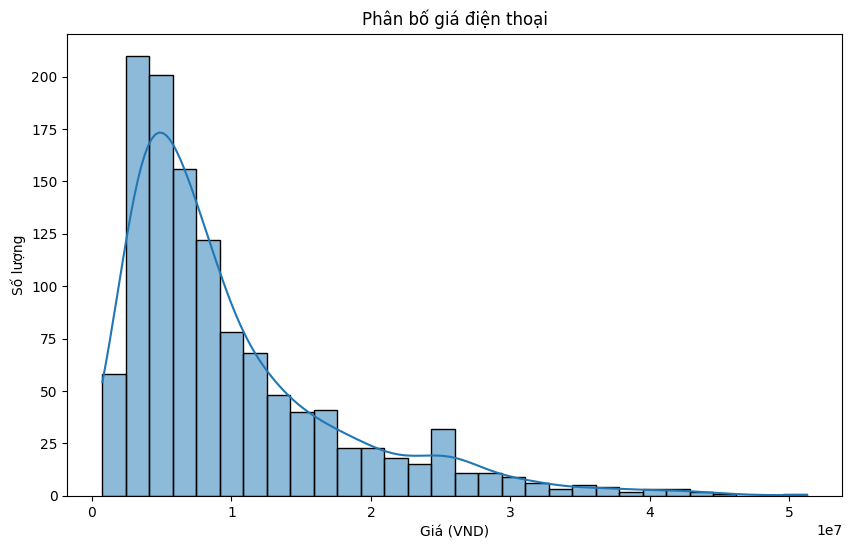

In [134]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title("Phân bố giá điện thoại")
plt.xlabel("Giá (VND)")
plt.ylabel("Số lượng")
plt.show()


Nhận xét: Giá điện thoại tập trung chủ yếu ở mức giá từ 4 - 12 triệu

### Count Plot: Phân bố số lượng điện thoại theo thương hiệu

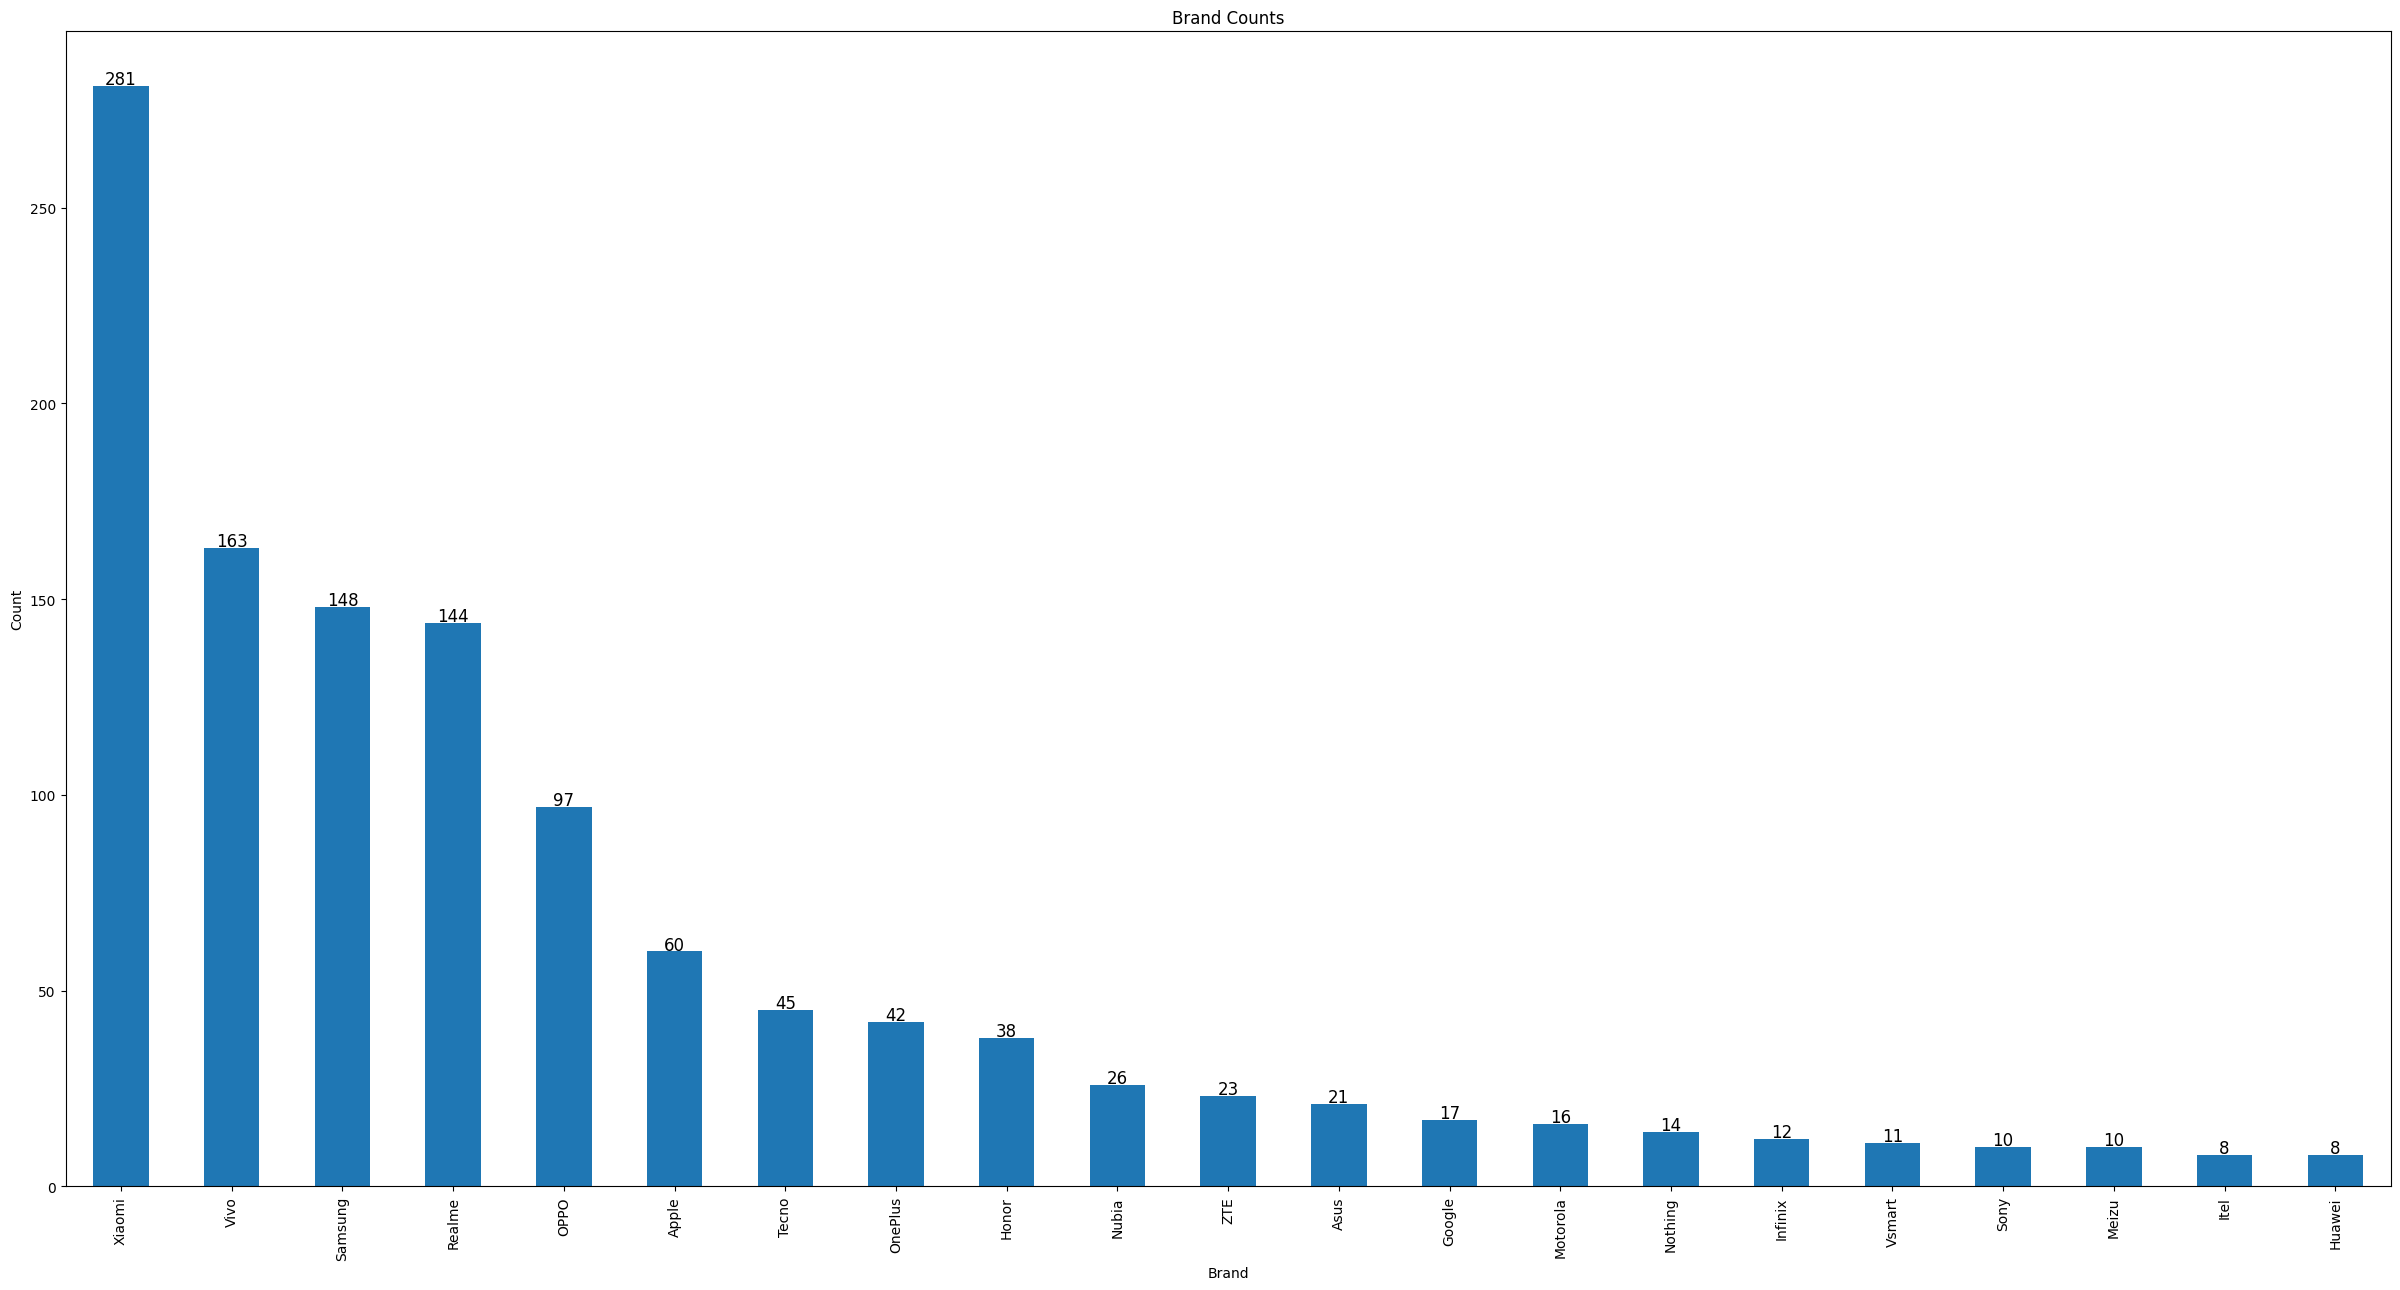

In [135]:
brand_counts = df['brand'].value_counts()
plt.figure(figsize=(30,15))
brand_counts.plot(kind='bar')

# Thêm tiêu đề và nhãn
plt.title('Brand Counts')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Hiển thị số lượng trên từng cột
for i, count in enumerate(brand_counts):
    plt.text(i, count + 0.5, str(count), ha='center', fontsize=12)

# Hiển thị biểu đồ
plt.show()

### Count Plot: Phân bố số lượng điện thoại theo chip model

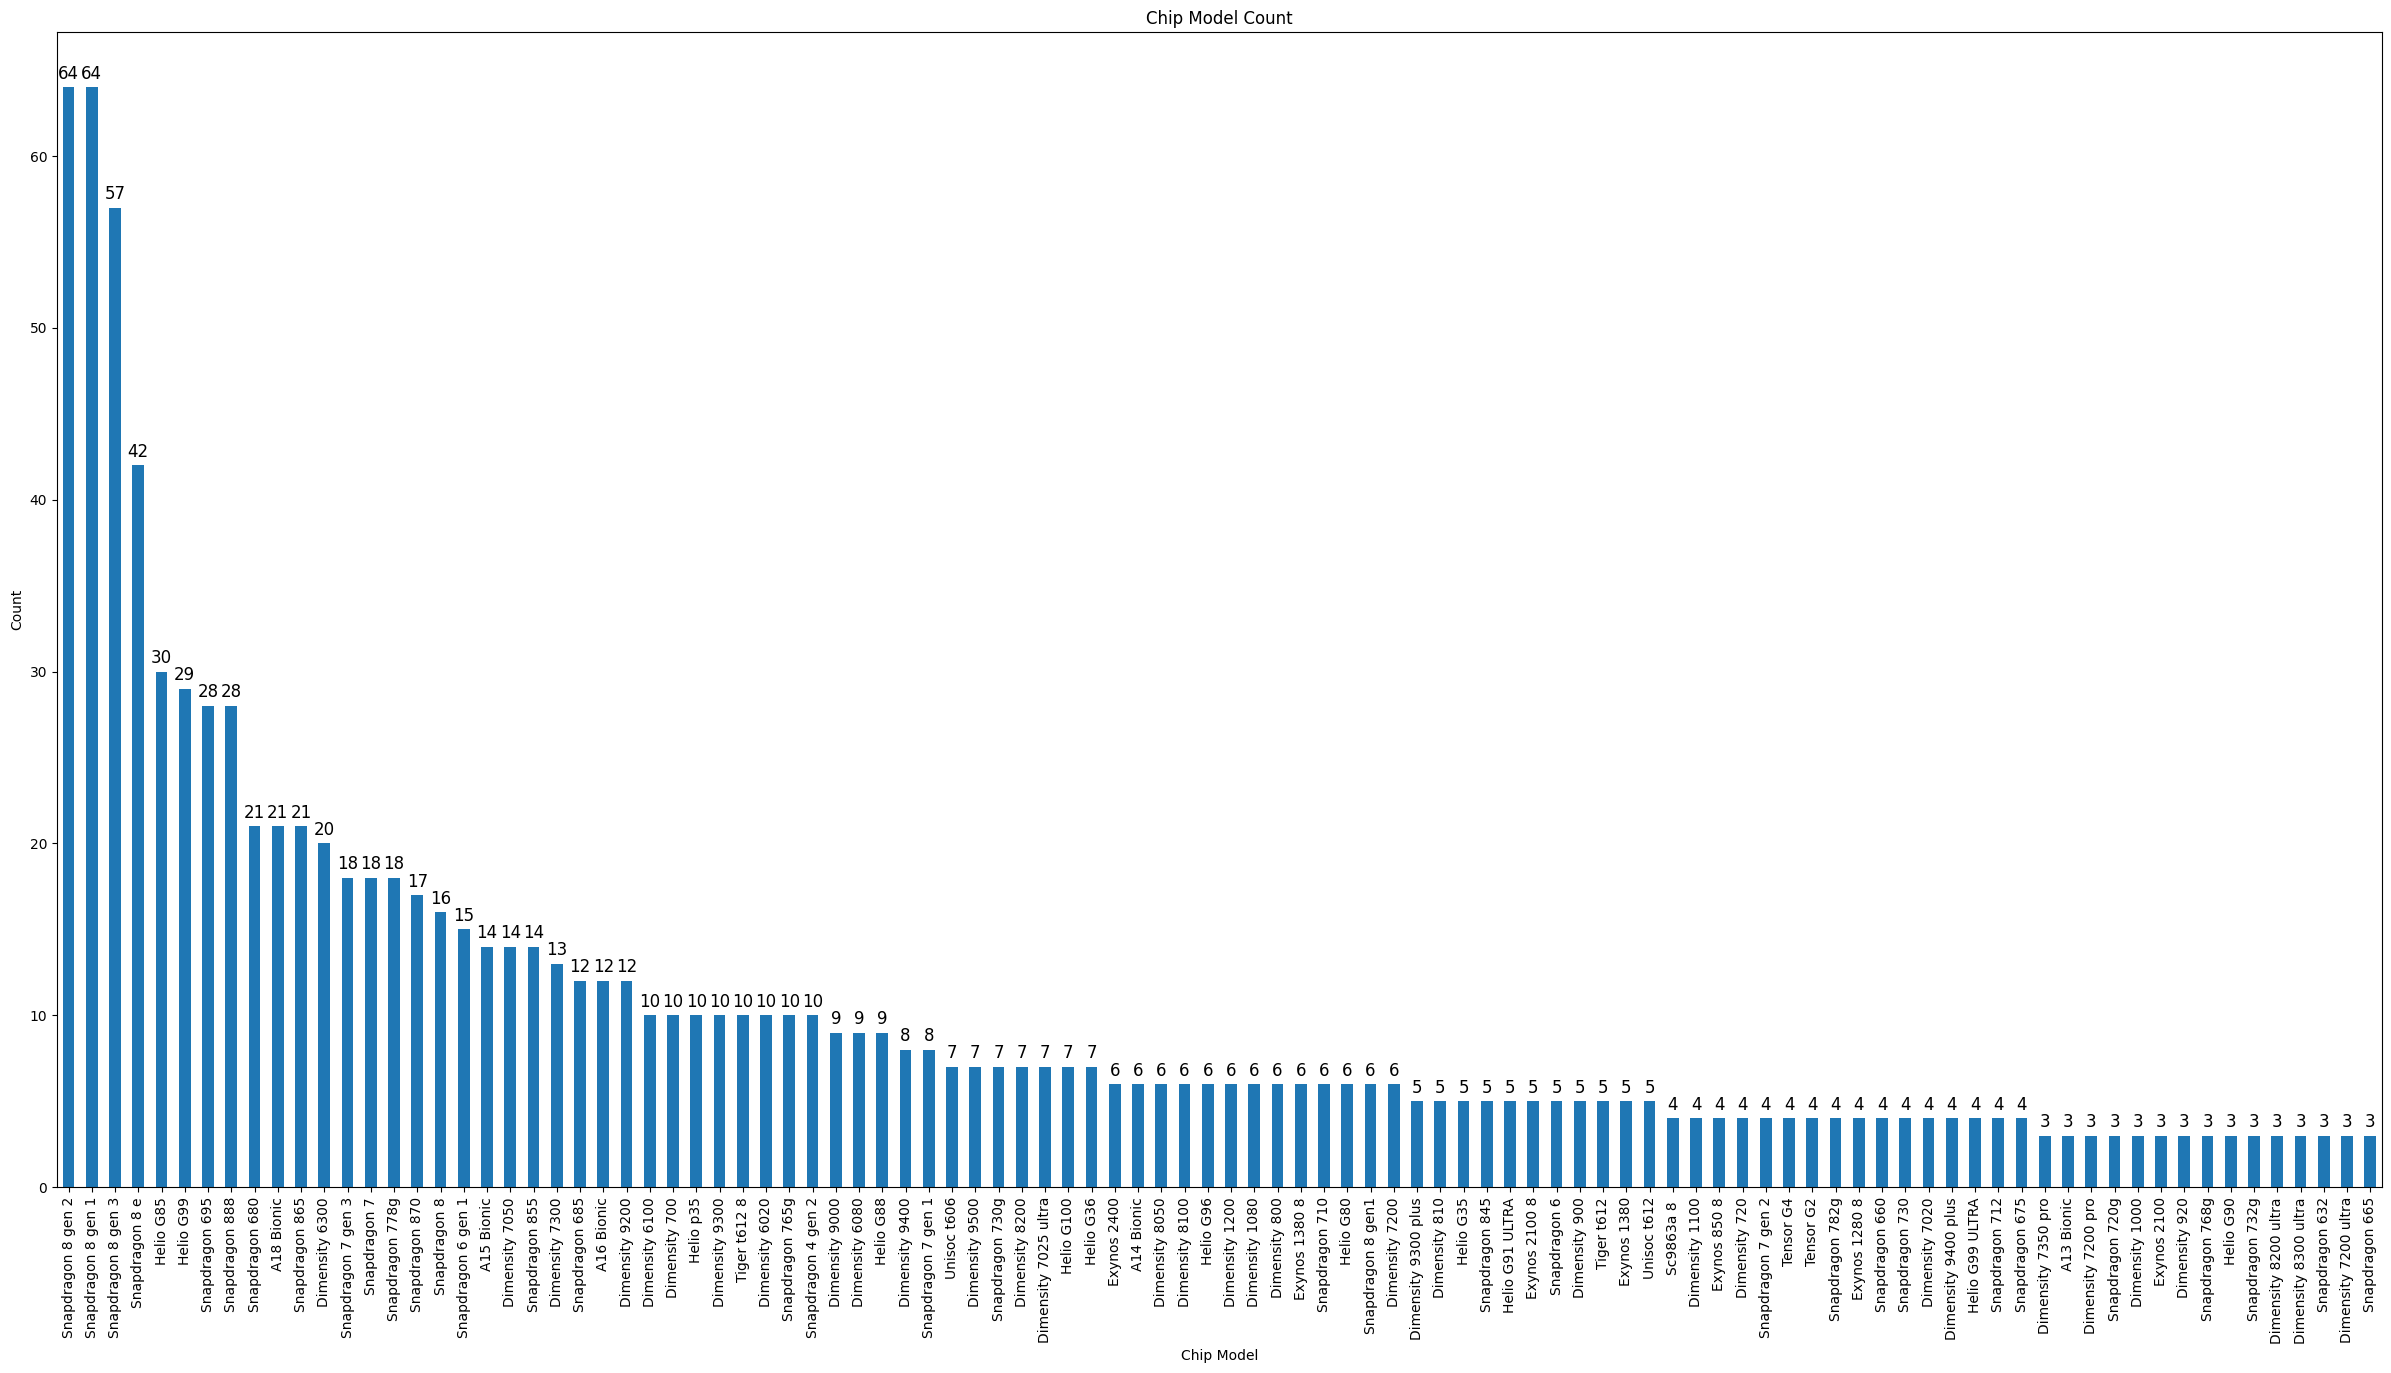

In [136]:
brand_counts = df['chip_model'].value_counts()[:100] 
plt.figure(figsize=(30,15))
brand_counts.plot(kind='bar')

# Thêm tiêu đề và nhãn
plt.title('Chip Model Count')
plt.xlabel('Chip Model')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Hiển thị số lượng trên từng cột
for i, count in enumerate(brand_counts):
    plt.text(i, count + 0.5, str(count), ha='center', fontsize=12)

# Hiển thị biểu đồ
plt.show()

### Quan hệ giữa price và các yếu tố phần cứng dạng numeric

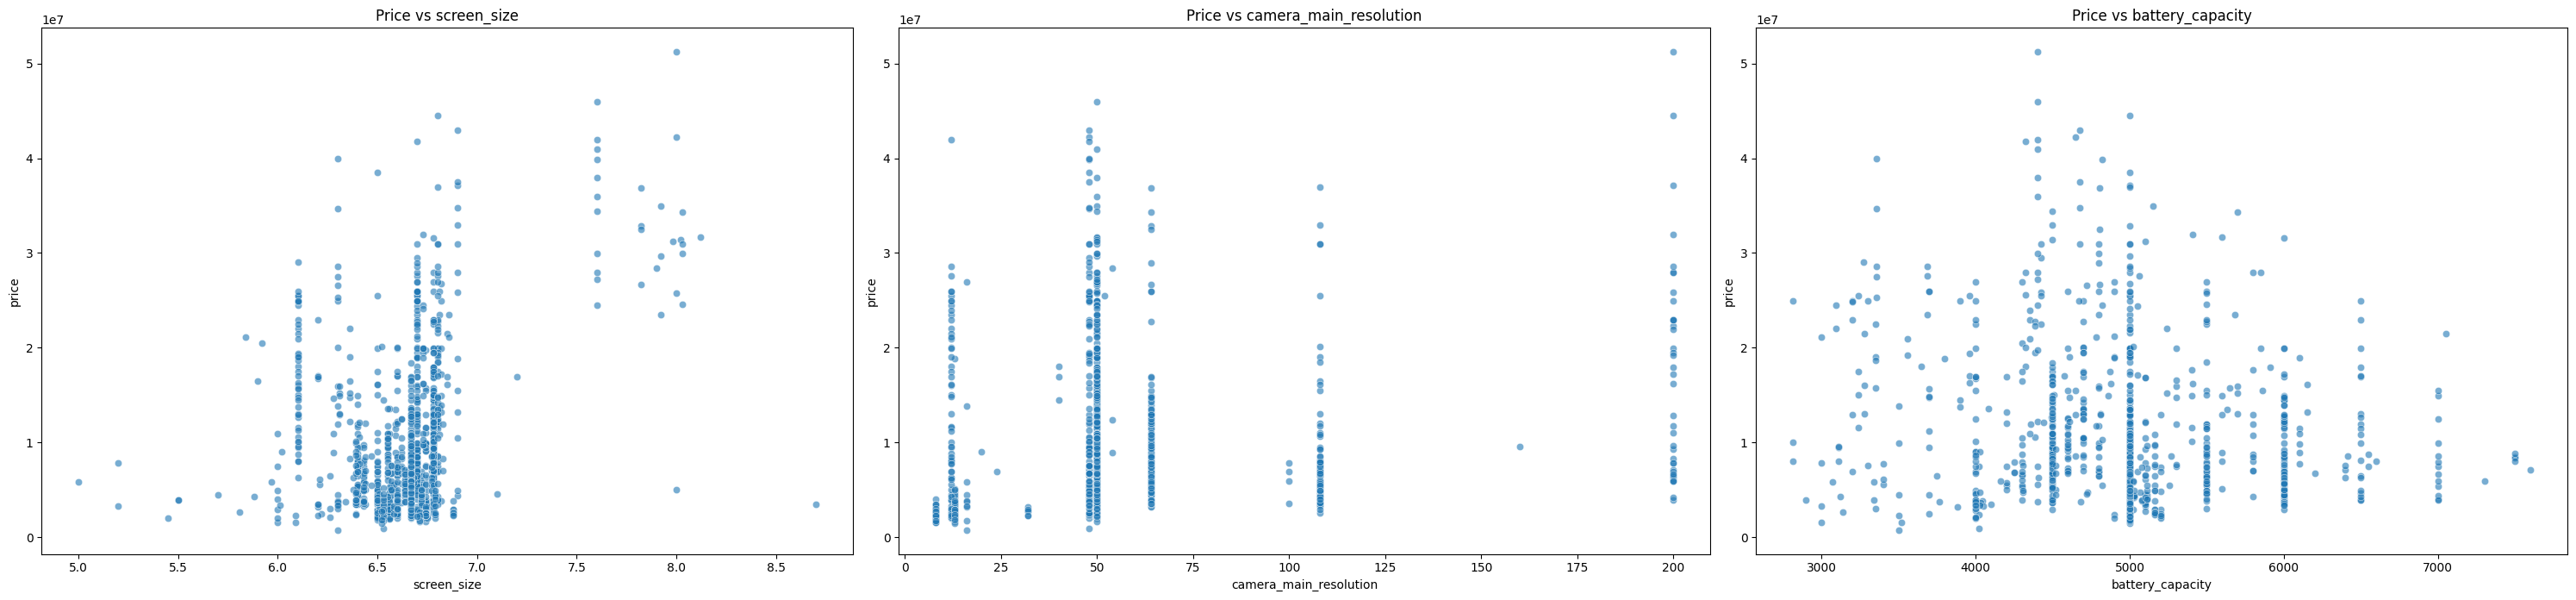

In [137]:
plt.figure(figsize=(30, 20))
for i, feature in enumerate(numeric_features[1:], 1):  
    plt.subplot(3, 3, i)
    sns.scatterplot(x=df[feature], y=df['price'], alpha=0.6)
    plt.title(f'Price vs {feature}')
plt.tight_layout()
plt.show()


Nhận xét:
1. Price vs Screen Size
    - Không có xu hướng rõ ràng giữa kích thước màn hình và giá.
    - Tuy nhiên, các điện thoại có màn hình lớn hơn 6.5 inch thường có giá cao hơn.
2. Price vs Camera Main Resolution
    - Không có xu hướng tuyến tính giữa độ phân giải camera chính và giá.
    - Một số mẫu có độ phân giải cao (>100MP) nhưng giá trải rộng từ trung bình đến cao.
    - Điều này cho thấy độ phân giải không phải là yếu tố quyết định giá, mà còn liên quan đến cảm biến, thương hiệu, và công nghệ xử lý hình ảnh.
3. Price vs Battery Capacity
    - Các mẫu điện thoại có pin tập trung chủ yếu từ 4000mAh - 6000mAh và mức giá phân bố rộng, tập trung chủ yếu ở mức giá trung bình, trung bình cao
    - Không có xu hướng rõ ràng giữa sức chứa của pin với giá điện thoại


### Quan hệ giữa price và các yếu tố phần cứng dạng numeric nhưng giống với category (chỉ chứa vài giá trị cố định)

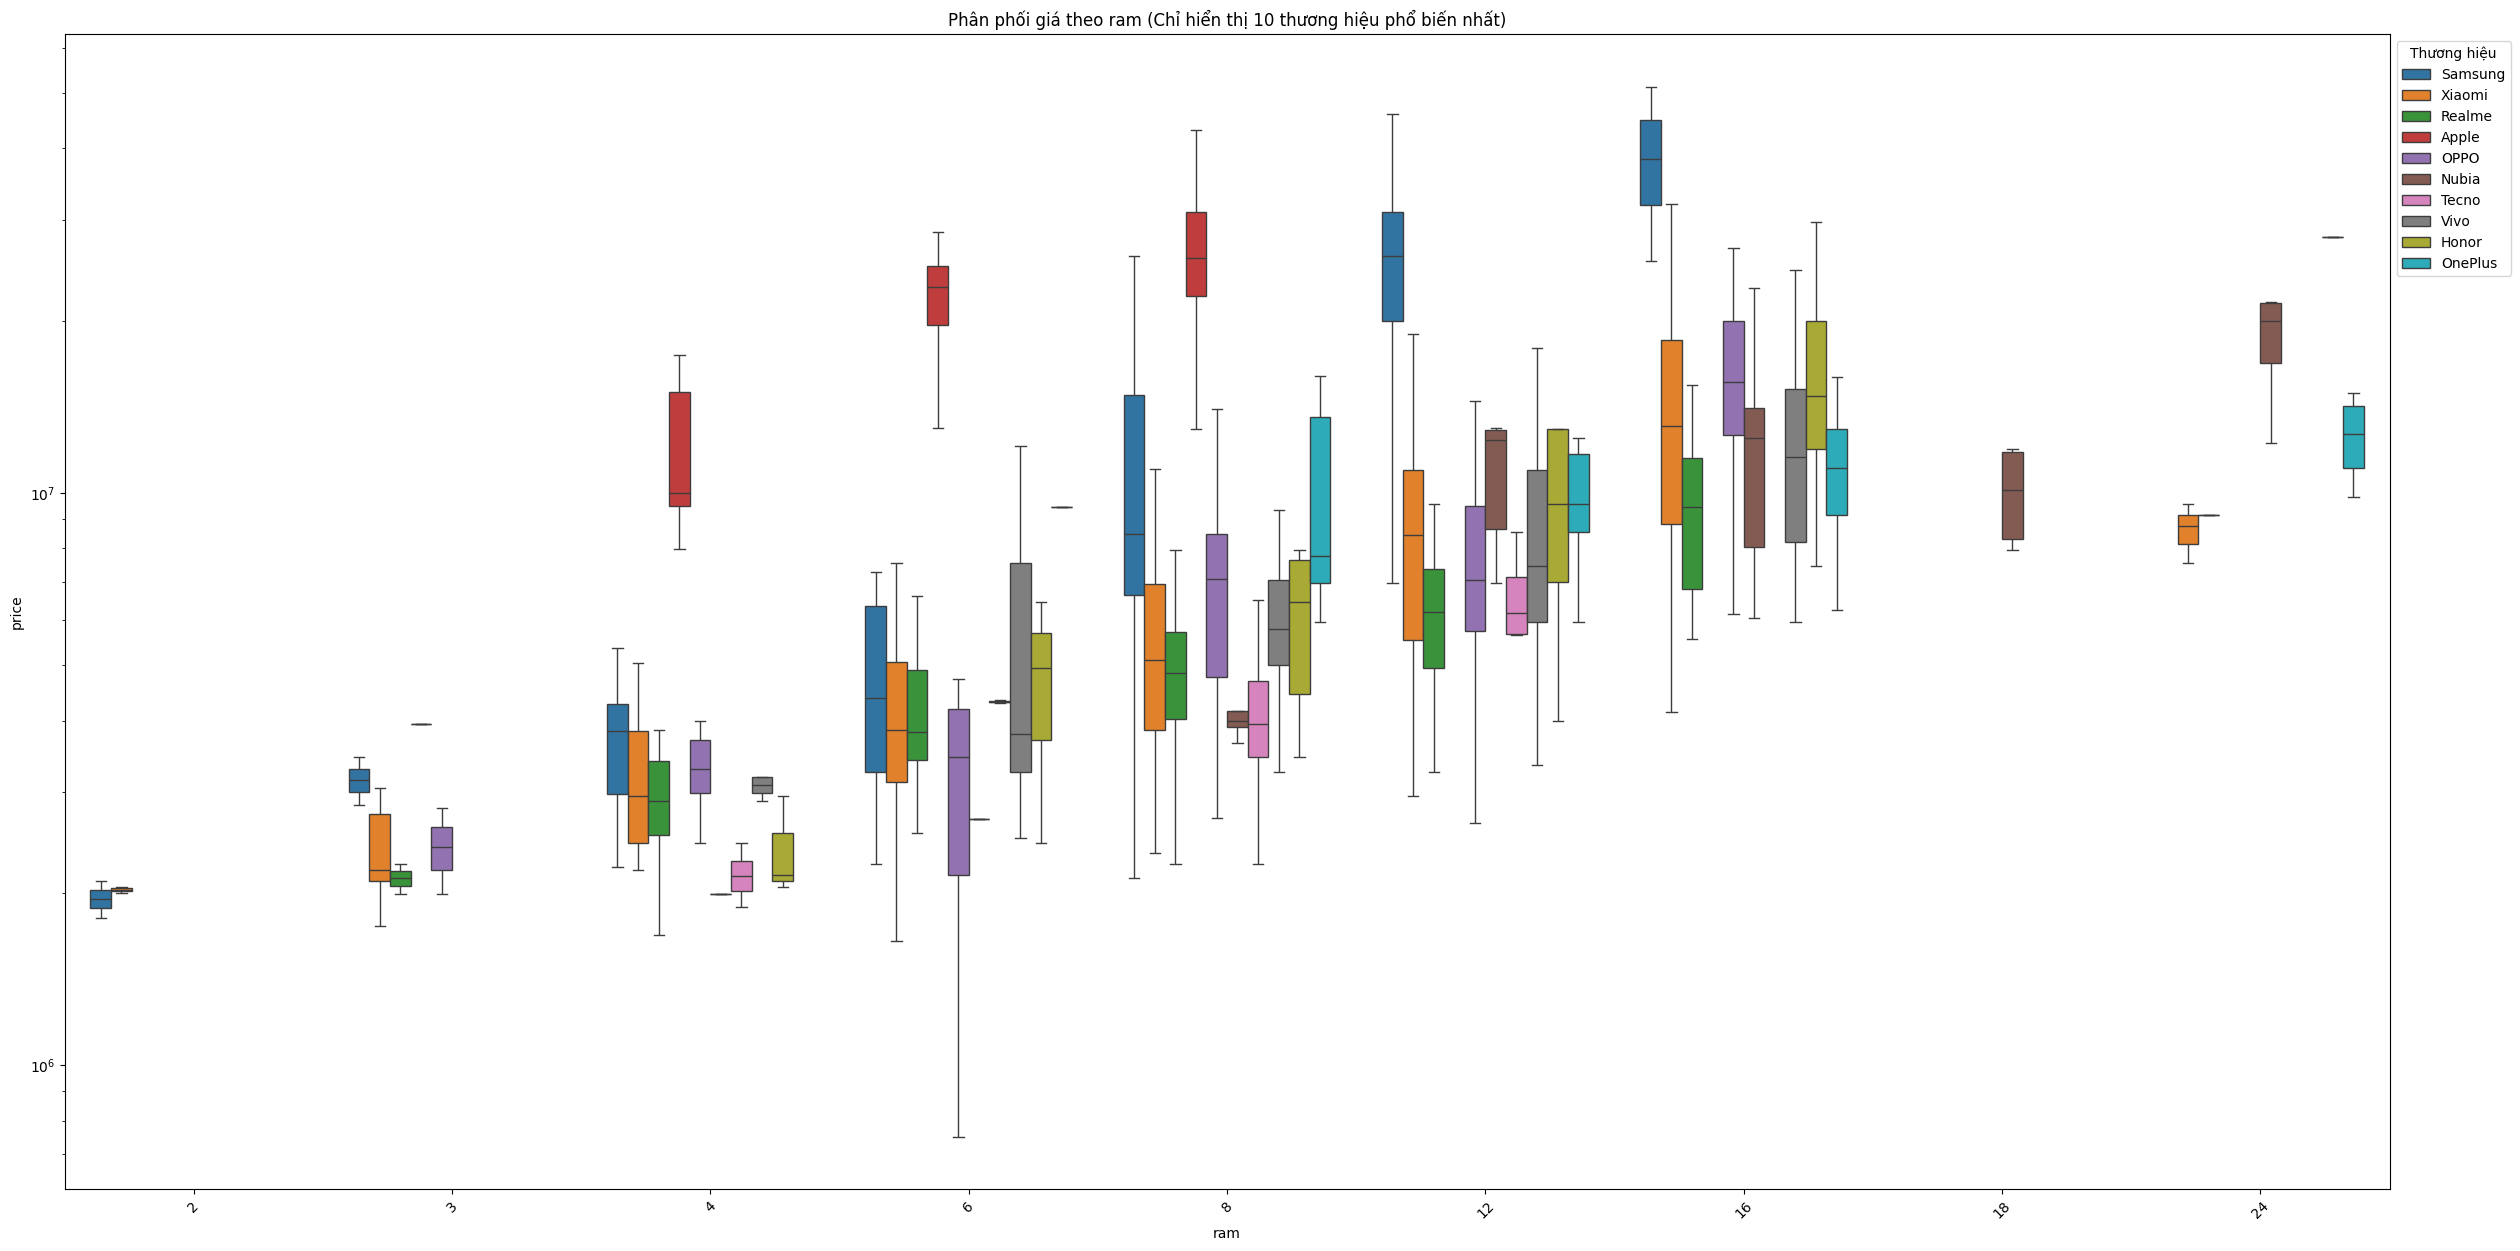

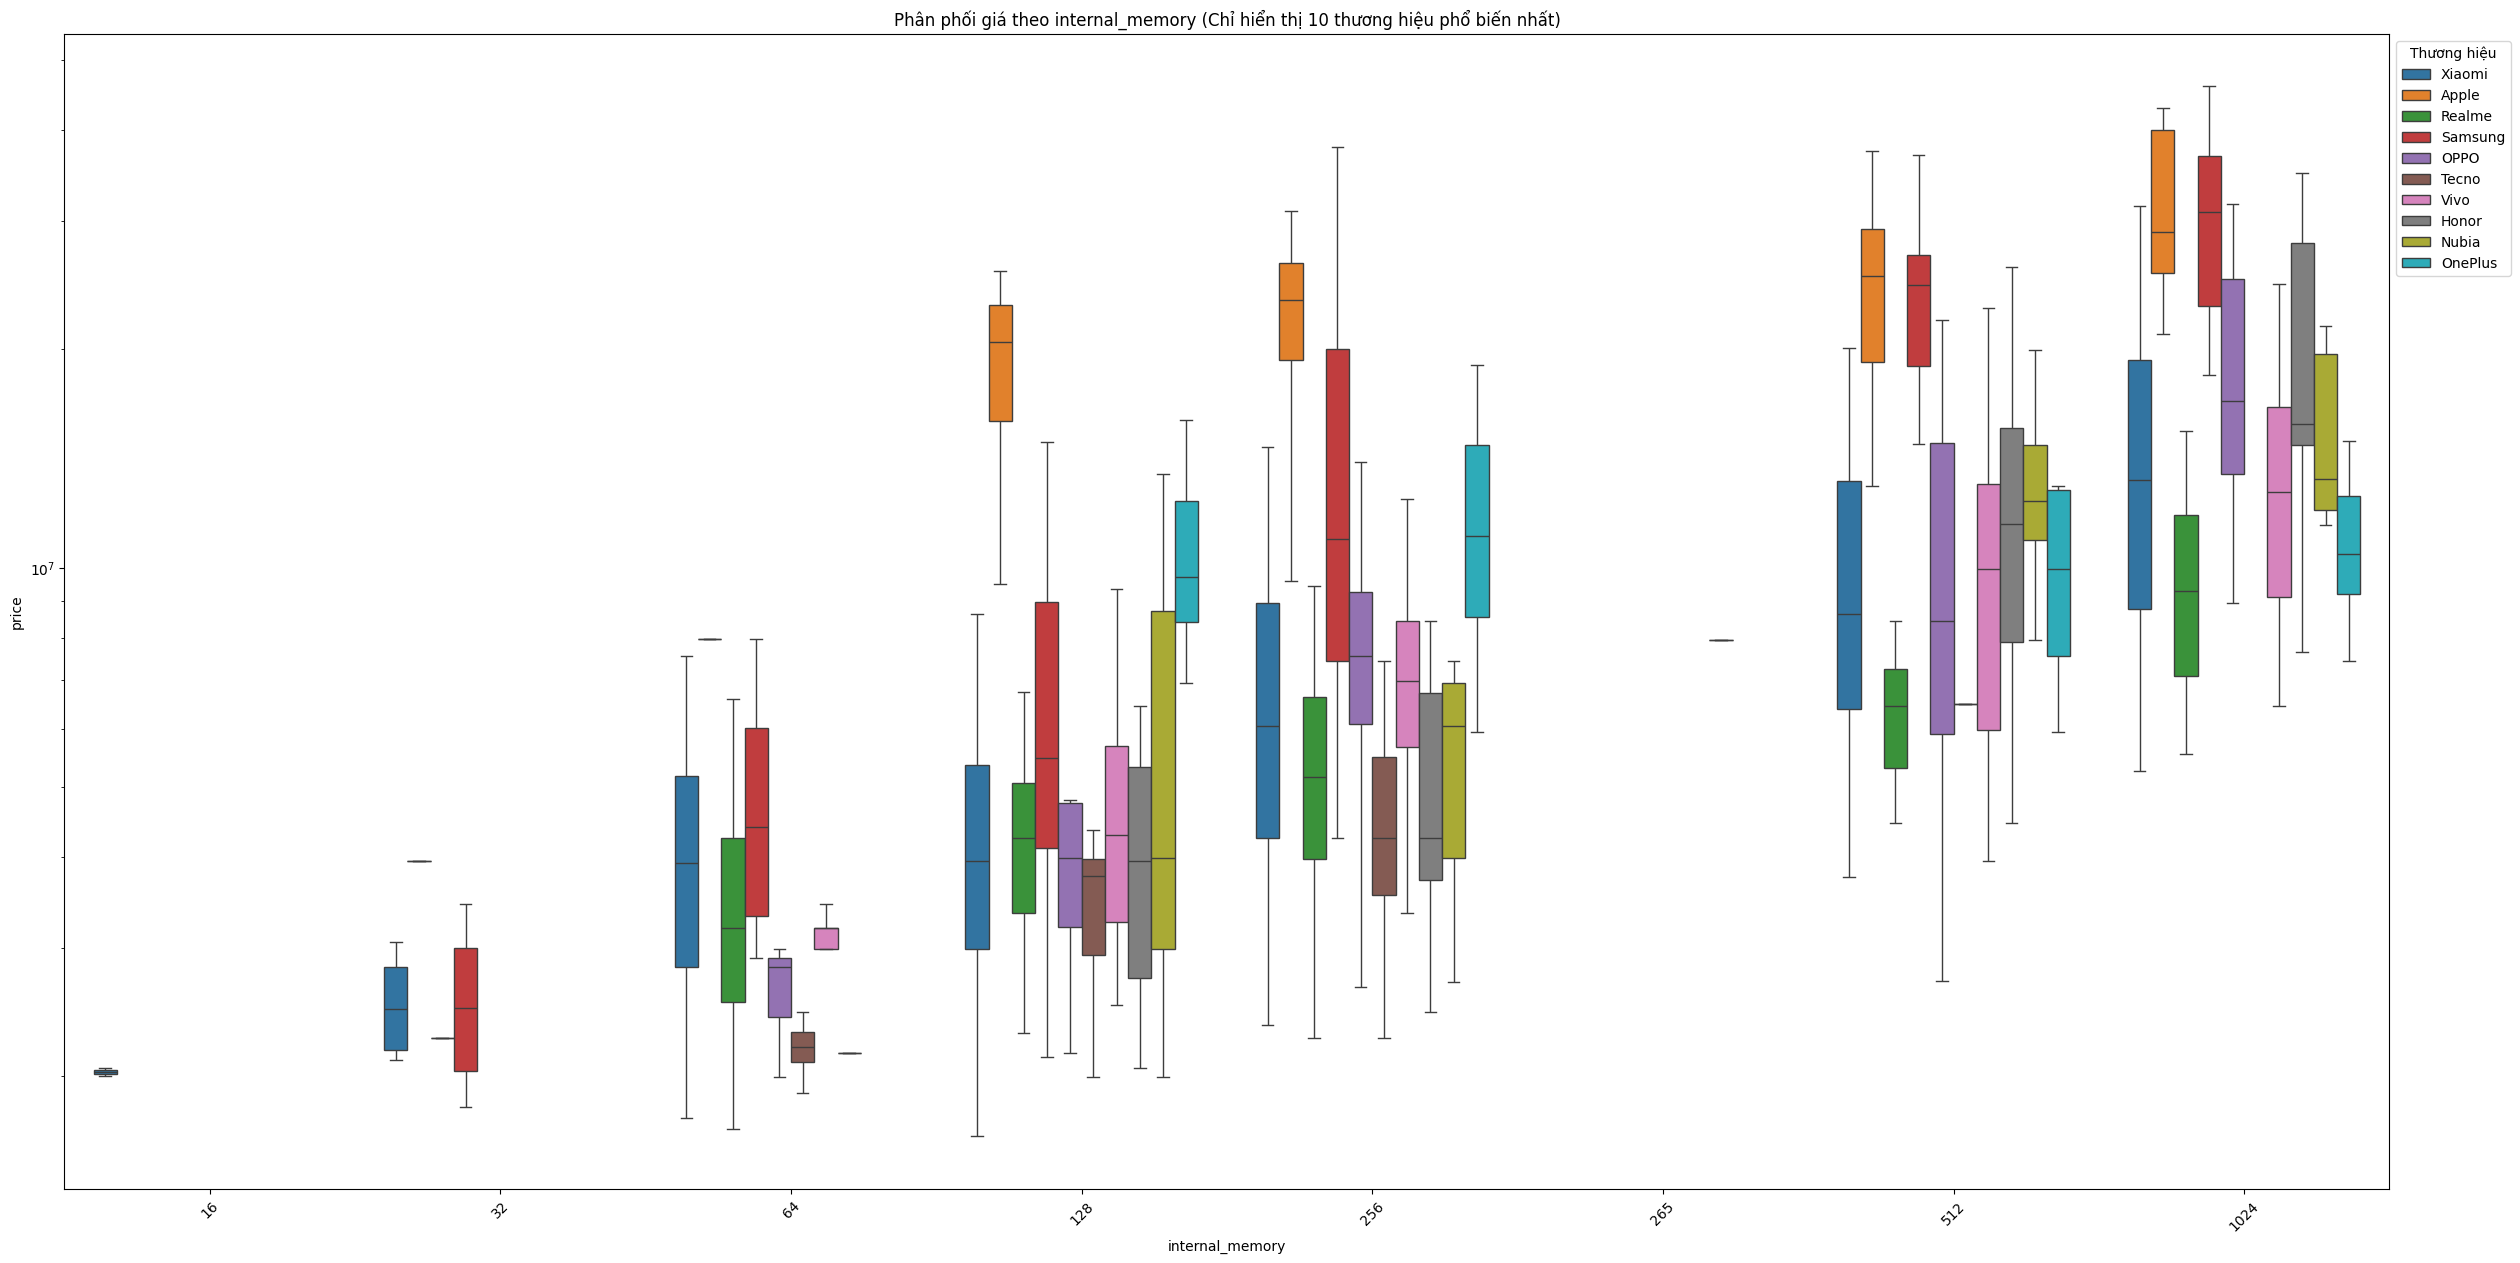

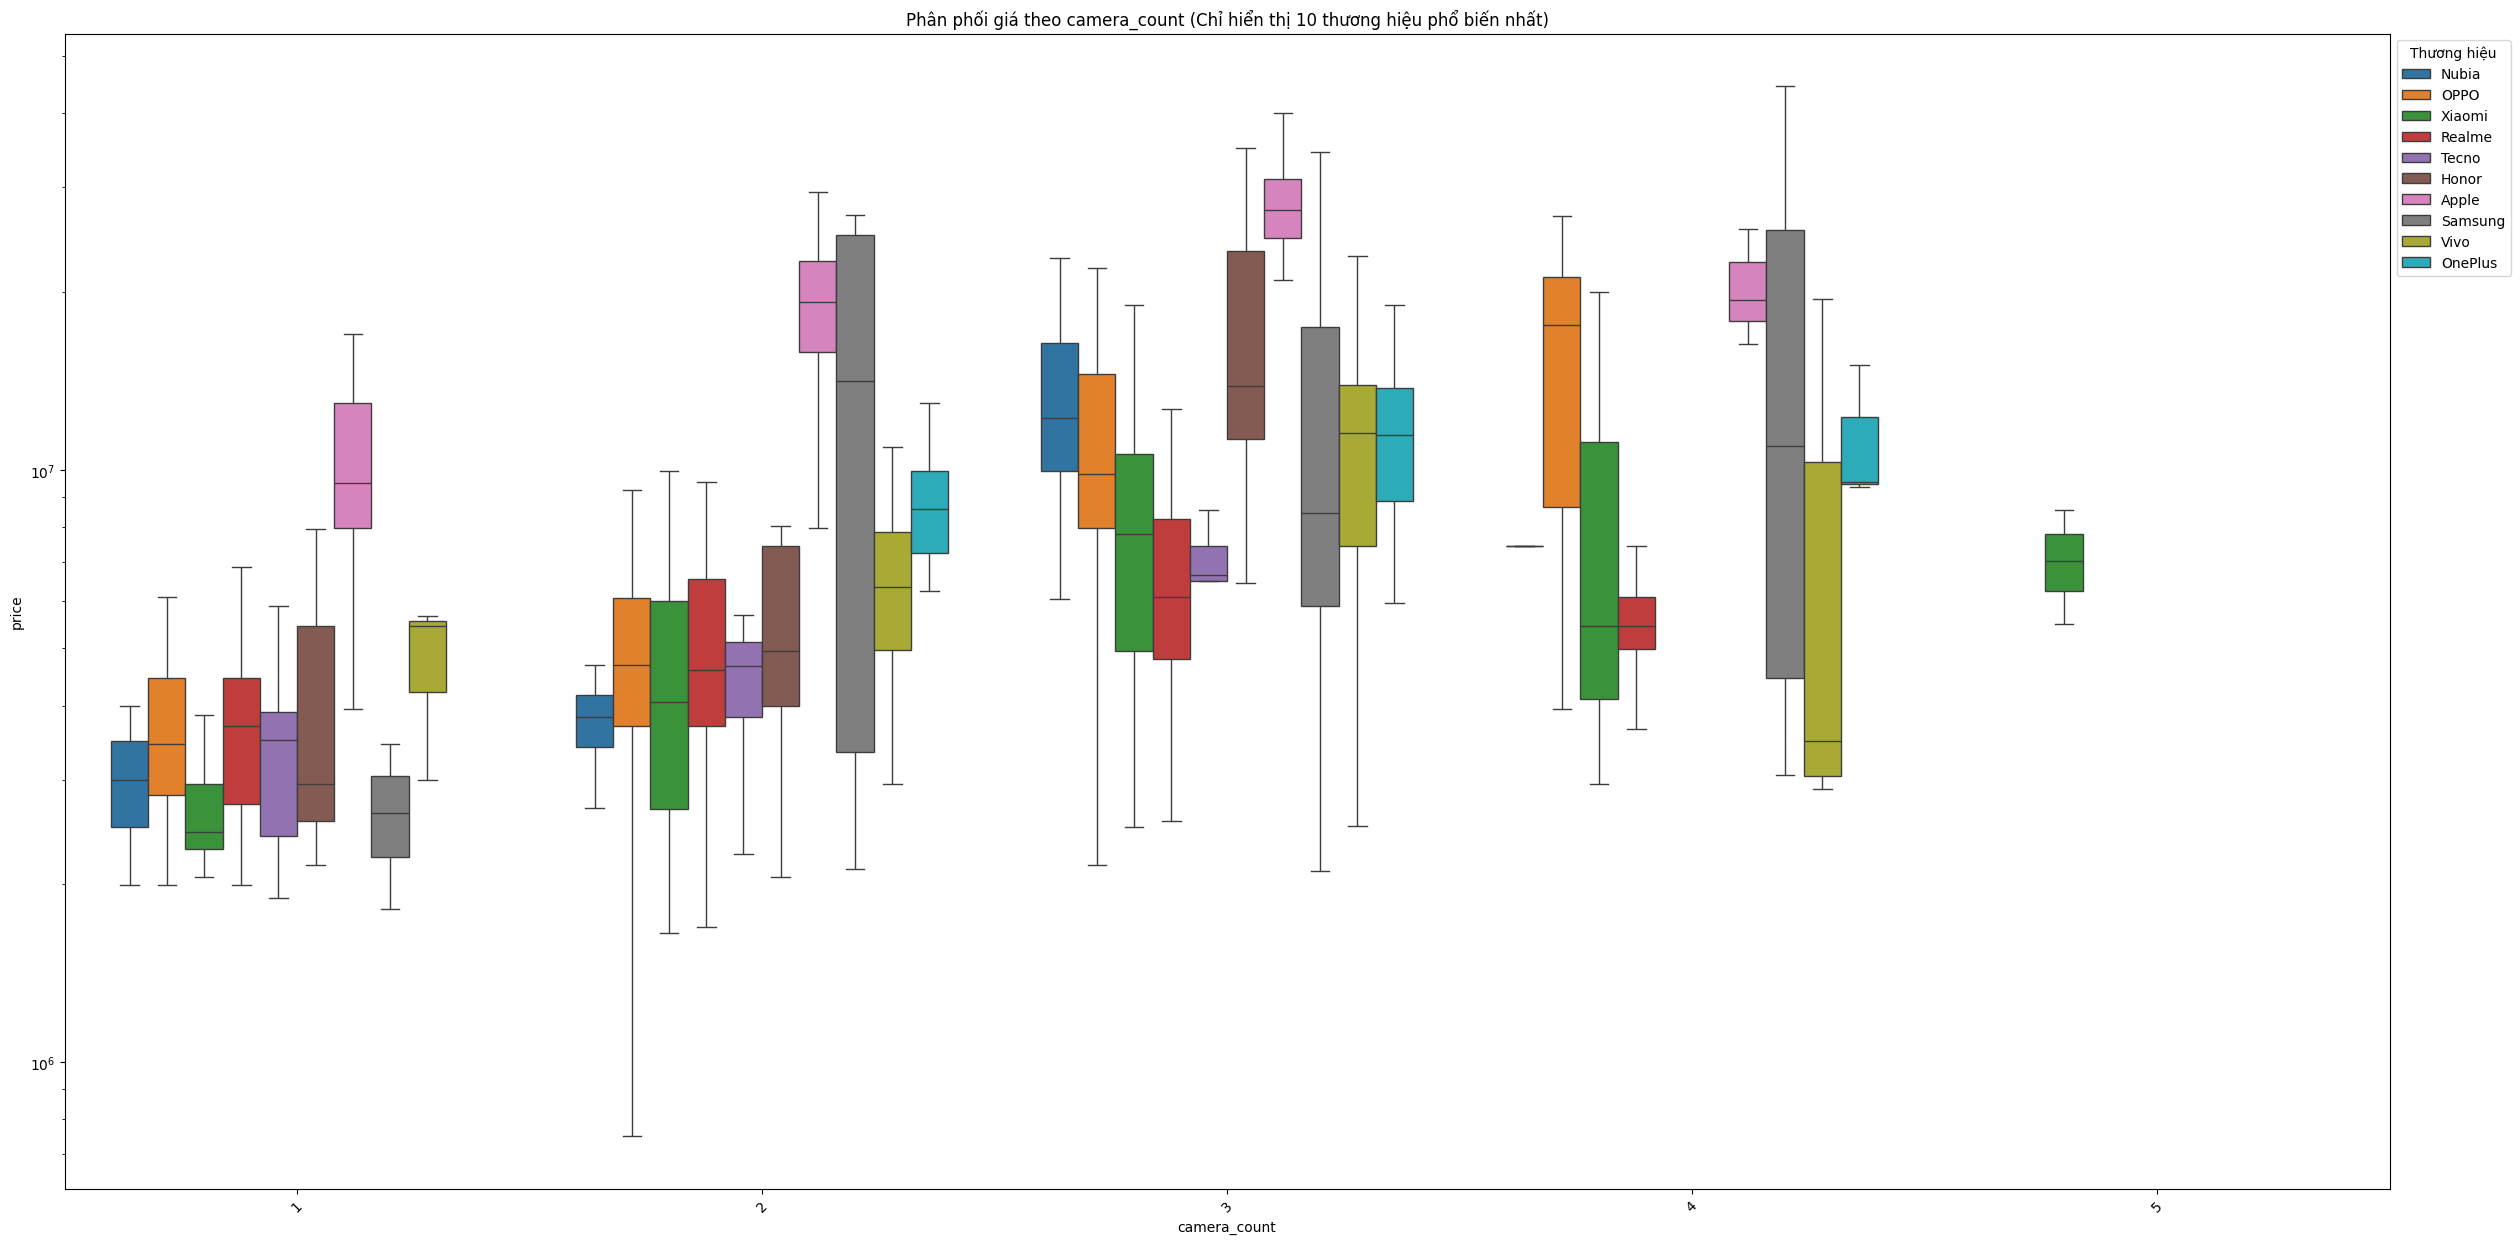

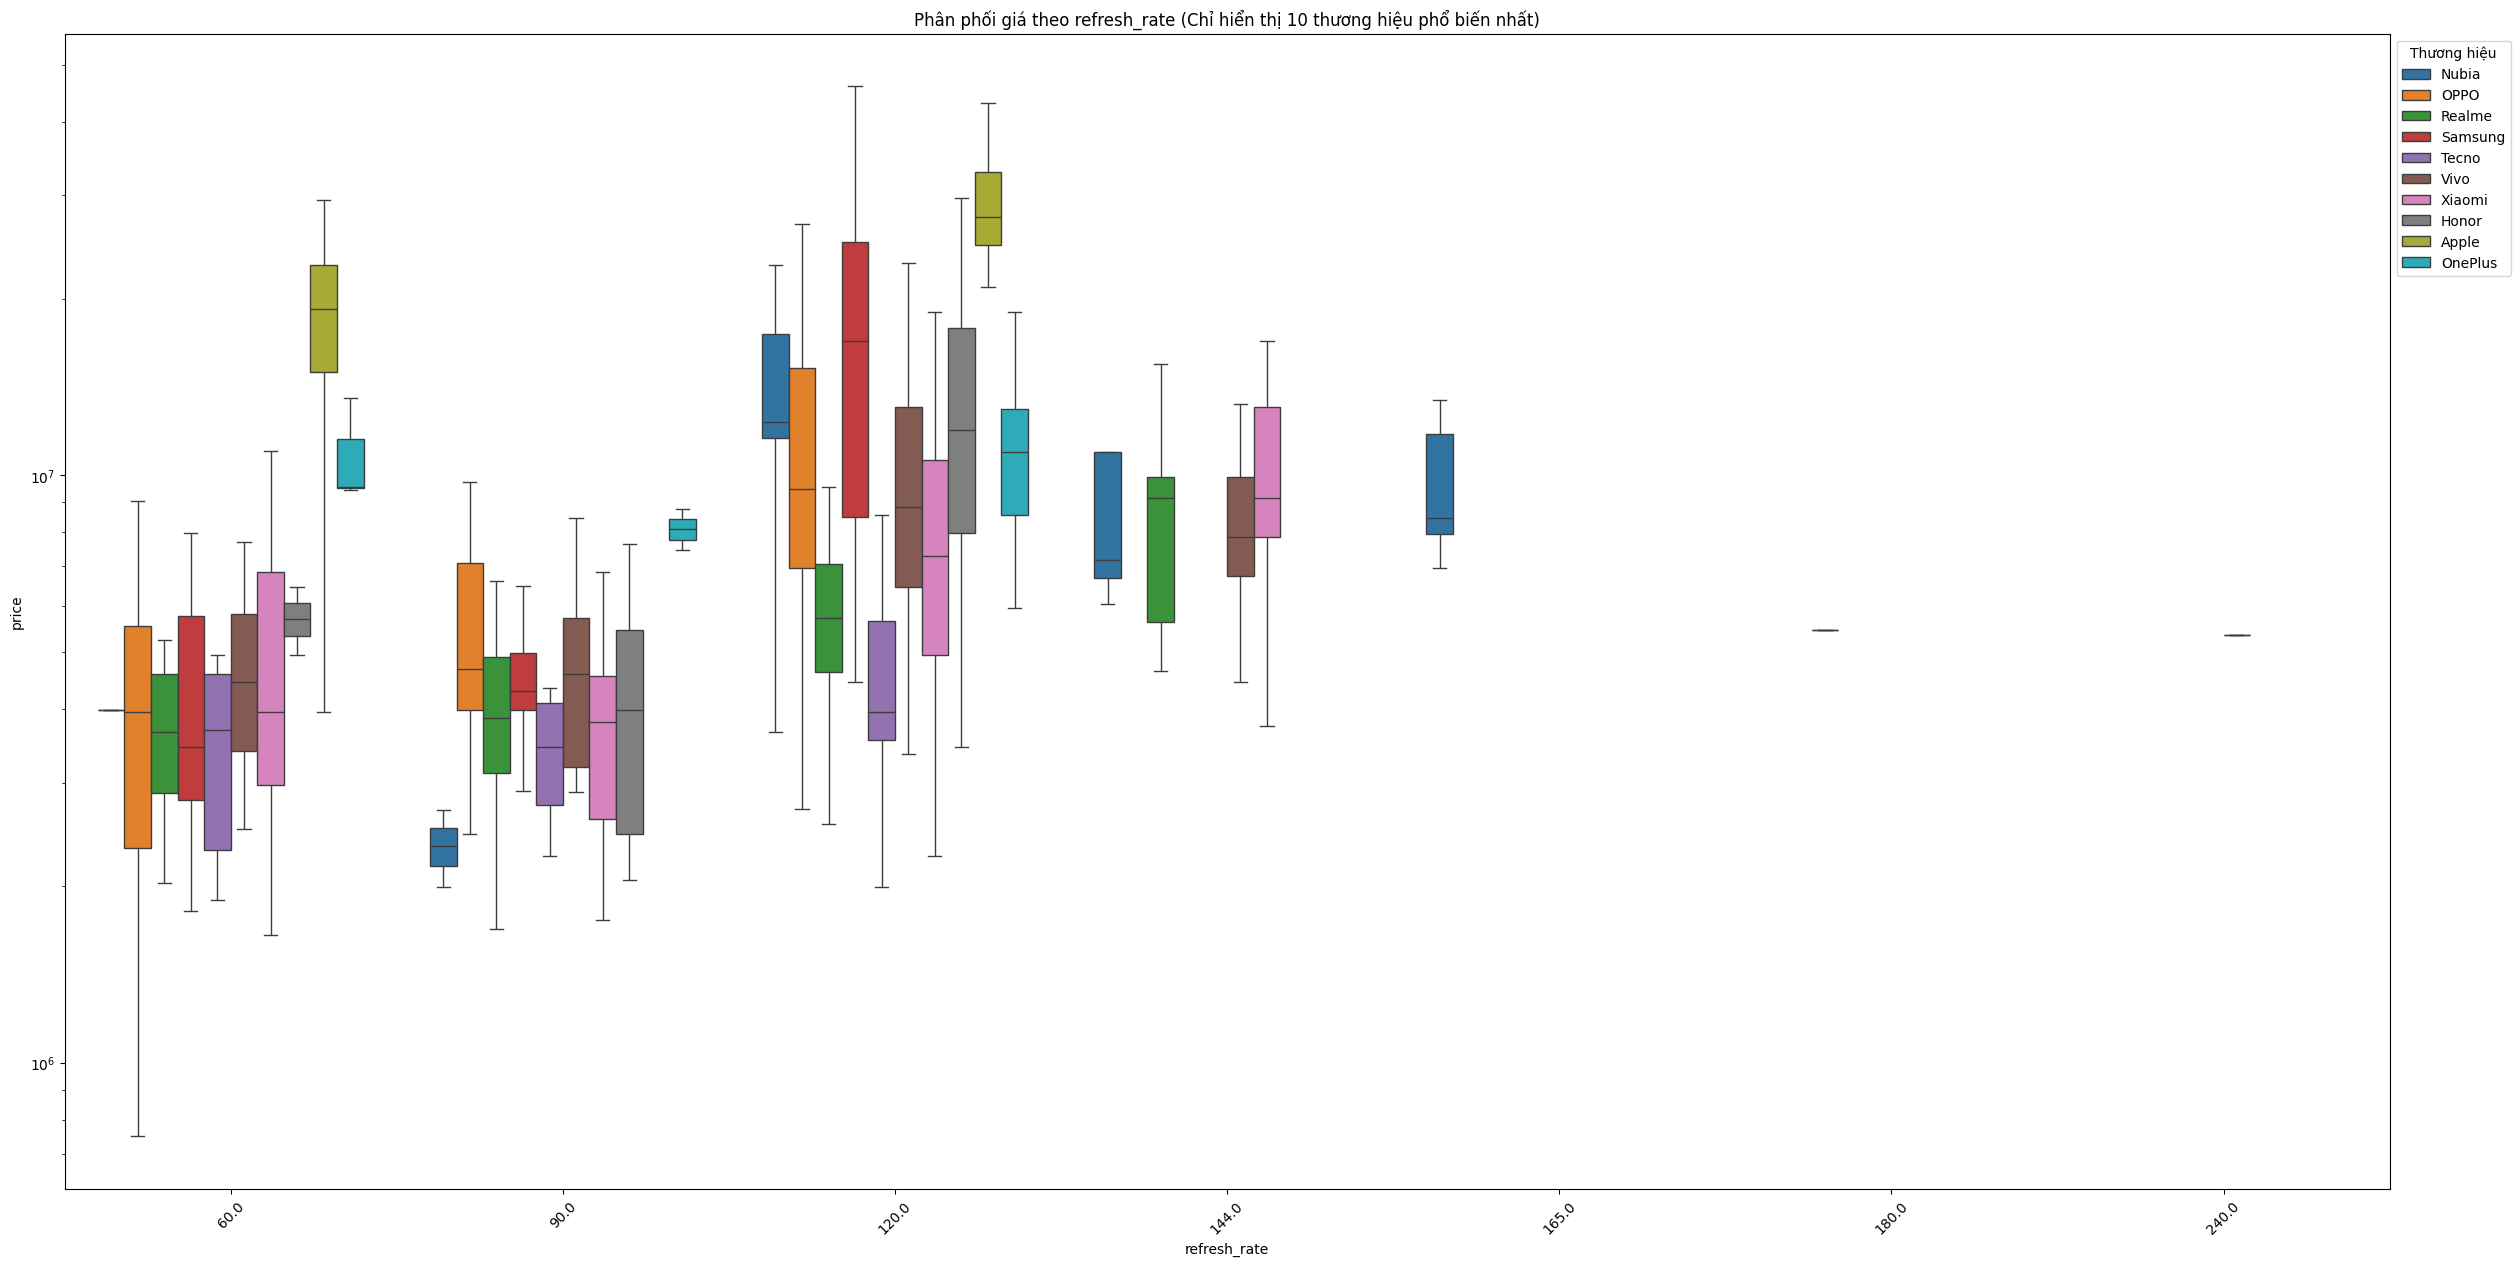

In [139]:
top_brands = df["brand"].value_counts().index[:10]  # Chọn 10 thương hiệu phổ biến nhất
df_filtered = df[df["brand"].isin(top_brands)]

for feature in numeric_like_categorical:
    plt.figure(figsize=(30, 15))
    sns.boxplot(x=feature, y="price", hue="brand", data=df_filtered, showfliers=False)
    plt.xticks(rotation=45)
    plt.yscale("log")  # Giữ log scale để tránh outliers quá lớn
    plt.legend(title="Thương hiệu", loc="upper left", bbox_to_anchor=(1, 1))
    plt.title(f"Phân phối giá theo {feature} (Chỉ hiển thị 10 thương hiệu phổ biến nhất)")
    plt.show()


Nhận xét:
1. Price vs Ram
    - Xu hướng giá tăng theo dung lượng RAM khá rõ ràng.
    - Tuy nhiên, có nhiều mức RAM giống nhau nhưng giá khác biệt lớn cho thấy giá còn phụ thuộc vào brand và các yếu tố khác
2. Price vs Internal Memory
    - Giá có xu hướng tăng khi bộ nhớ trong tăng.
    - Một số mẫu điện thoại có bộ nhớ cực lớn (512GB, 1TB) nhưng giá lại không theo quy luật tuyến tính do còn phụ thuộc và các yếu tố khác
3. Price vs Camera Count
    - Số lượng camera và giá có một chút tương quan, nhưng không mạnh.
    - Một số mẫu có nhiều camera nhưng giá vẫn thấp, có thể là điện thoại tầm trung với nhiều ống kính nhưng chất lượng trung bình.

Tổng kết:
- RAM và bộ nhớ trong có mối quan hệ khá rõ ràng với giá, điện thoại có RAM và bộ nhớ cao thường có giá cao hơn.
- Camera, số lượng camera, và dung lượng pin không có mối quan hệ tuyến tính rõ rệt với giá.
- Kích thước màn hình có ảnh hưởng đến giá nhưng không phải là yếu tố quyết định duy nhất.

        

### Correlation Map (Heatmap)

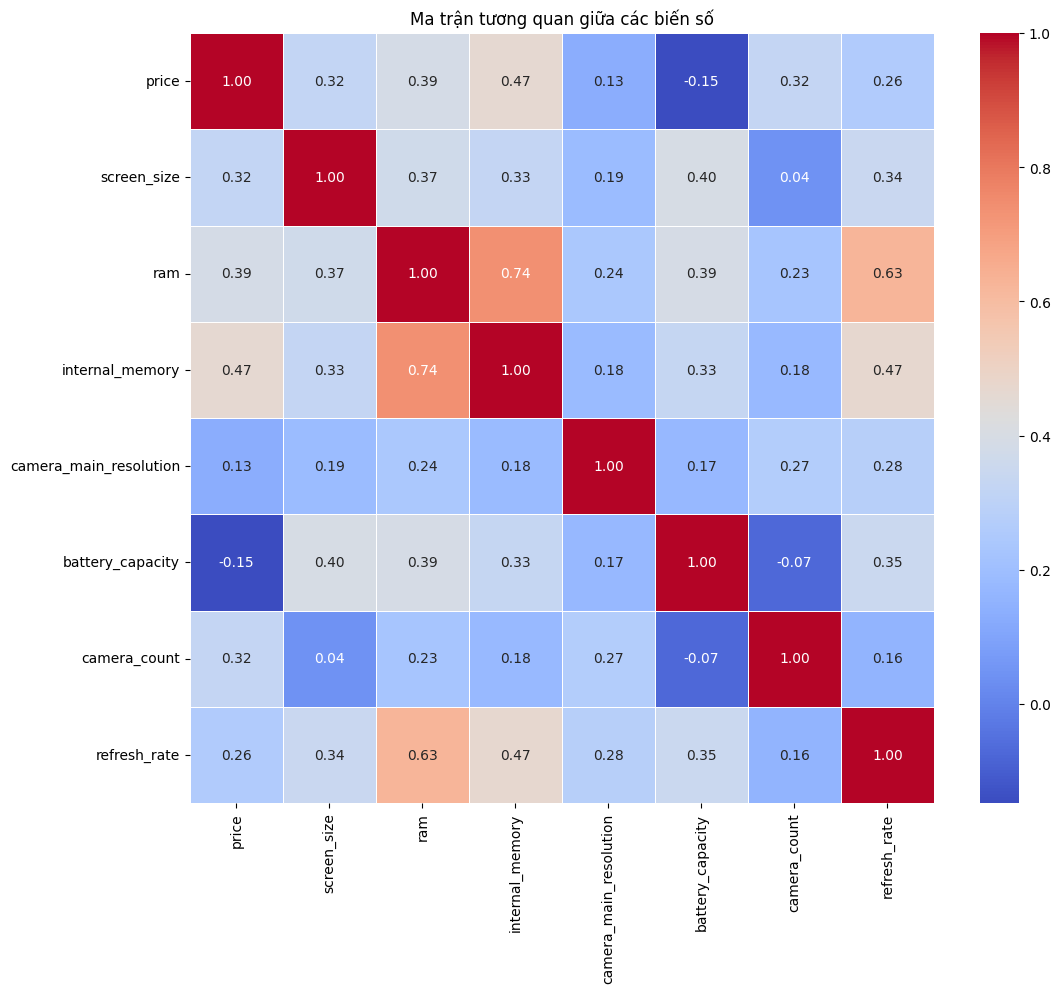

In [140]:
numeric_features = [
    'price', 'screen_size', 'ram', 'internal_memory',
    'camera_main_resolution', 'battery_capacity', 'camera_count', 'refresh_rate',
]
plt.figure(figsize=(12, 10))
corr = df[numeric_features].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Ma trận tương quan giữa các biến số")
plt.show()

Nhận xét:
1. internal_memory (0.47):
    - Đây là biến có hệ số tương quan cao nhất trong số các yếu tố, cho thấy rằng khi bộ nhớ trong tăng, giá điện thoại có xu hướng tăng khá đáng kể.
    - Điều này phản ánh rằng các sản phẩm có bộ nhớ lớn thường thuộc phân khúc cao cấp, với nhiều tính năng và cấu hình mạnh mẽ.
2. ram (0.39):
    - Mức tương quan này cho thấy RAM cũng có ảnh hưởng khá rõ đến giá.
    - Các mẫu điện thoại có RAM cao thường có hiệu năng tốt hơn, nhưng mức tăng giá khi RAM tăng có vẻ không mạnh bằng bộ nhớ trong.
3. screen_size (0.32):
    - Mối tương quan ở mức trung bình cho thấy kích thước màn hình góp phần nâng giá, tuy nhiên không phải yếu tố quyết định.
    - Điện thoại có màn hình lớn thường mang lại trải nghiệm xem tốt hơn nhưng các yếu tố khác (như thiết kế, công nghệ hiển thị) cũng đóng góp.
4. camera_count (0.32):
    - Số lượng camera có mối tương quan tương đương với screen_size, tức là khi điện thoại có nhiều camera hơn, giá có xu hướng tăng.
    - Tuy nhiên, số lượng camera không phản ánh toàn bộ chất lượng chụp ảnh, nên ảnh hưởng đến giá vẫn ở mức vừa phải.
5. refresh_rate (0.26):
    - Mặc dù refresh_rate cũng là tiêu chí quan trọng trong trải nghiệm màn hình, nhưng hệ số tương quan thấp hơn so với các yếu tố khác cho thấy nó có ảnh hưởng đến giá nhưng không quá mạnh.
    - Có thể do refresh_rate cao chủ yếu là đặc trưng của các dòng flagship, nhưng không phải yếu tố duy nhất quyết định giá.
6. camera_main_resolution (0.13):
    - Hệ số tương quan rất thấp cho thấy độ phân giải camera chính không đóng góp nhiều vào giá bán.
    - Điều này cho thấy rằng, ngoài số megapixel, chất lượng ảnh phụ thuộc vào cảm biến, khẩu độ, công nghệ xử lý ảnh và cách kết hợp của toàn bộ hệ thống camera.
7. battery_capacity (-0.15):
    - Hệ số tương quan âm nhẹ cho thấy rằng dung lượng pin có xu hướng liên quan nghịch với giá.
    - Có thể do các điện thoại giá thấp thường trang bị pin lớn để thu hút khách hàng (hoặc để bù đắp cho các hạn chế khác về cấu hình), trong khi các flagship chú trọng vào hiệu năng và thiết kế tổng thể chứ không nhất thiết phải có pin quá lớn.



### lmplot: Biểu đồ Regression theo từng nhóm

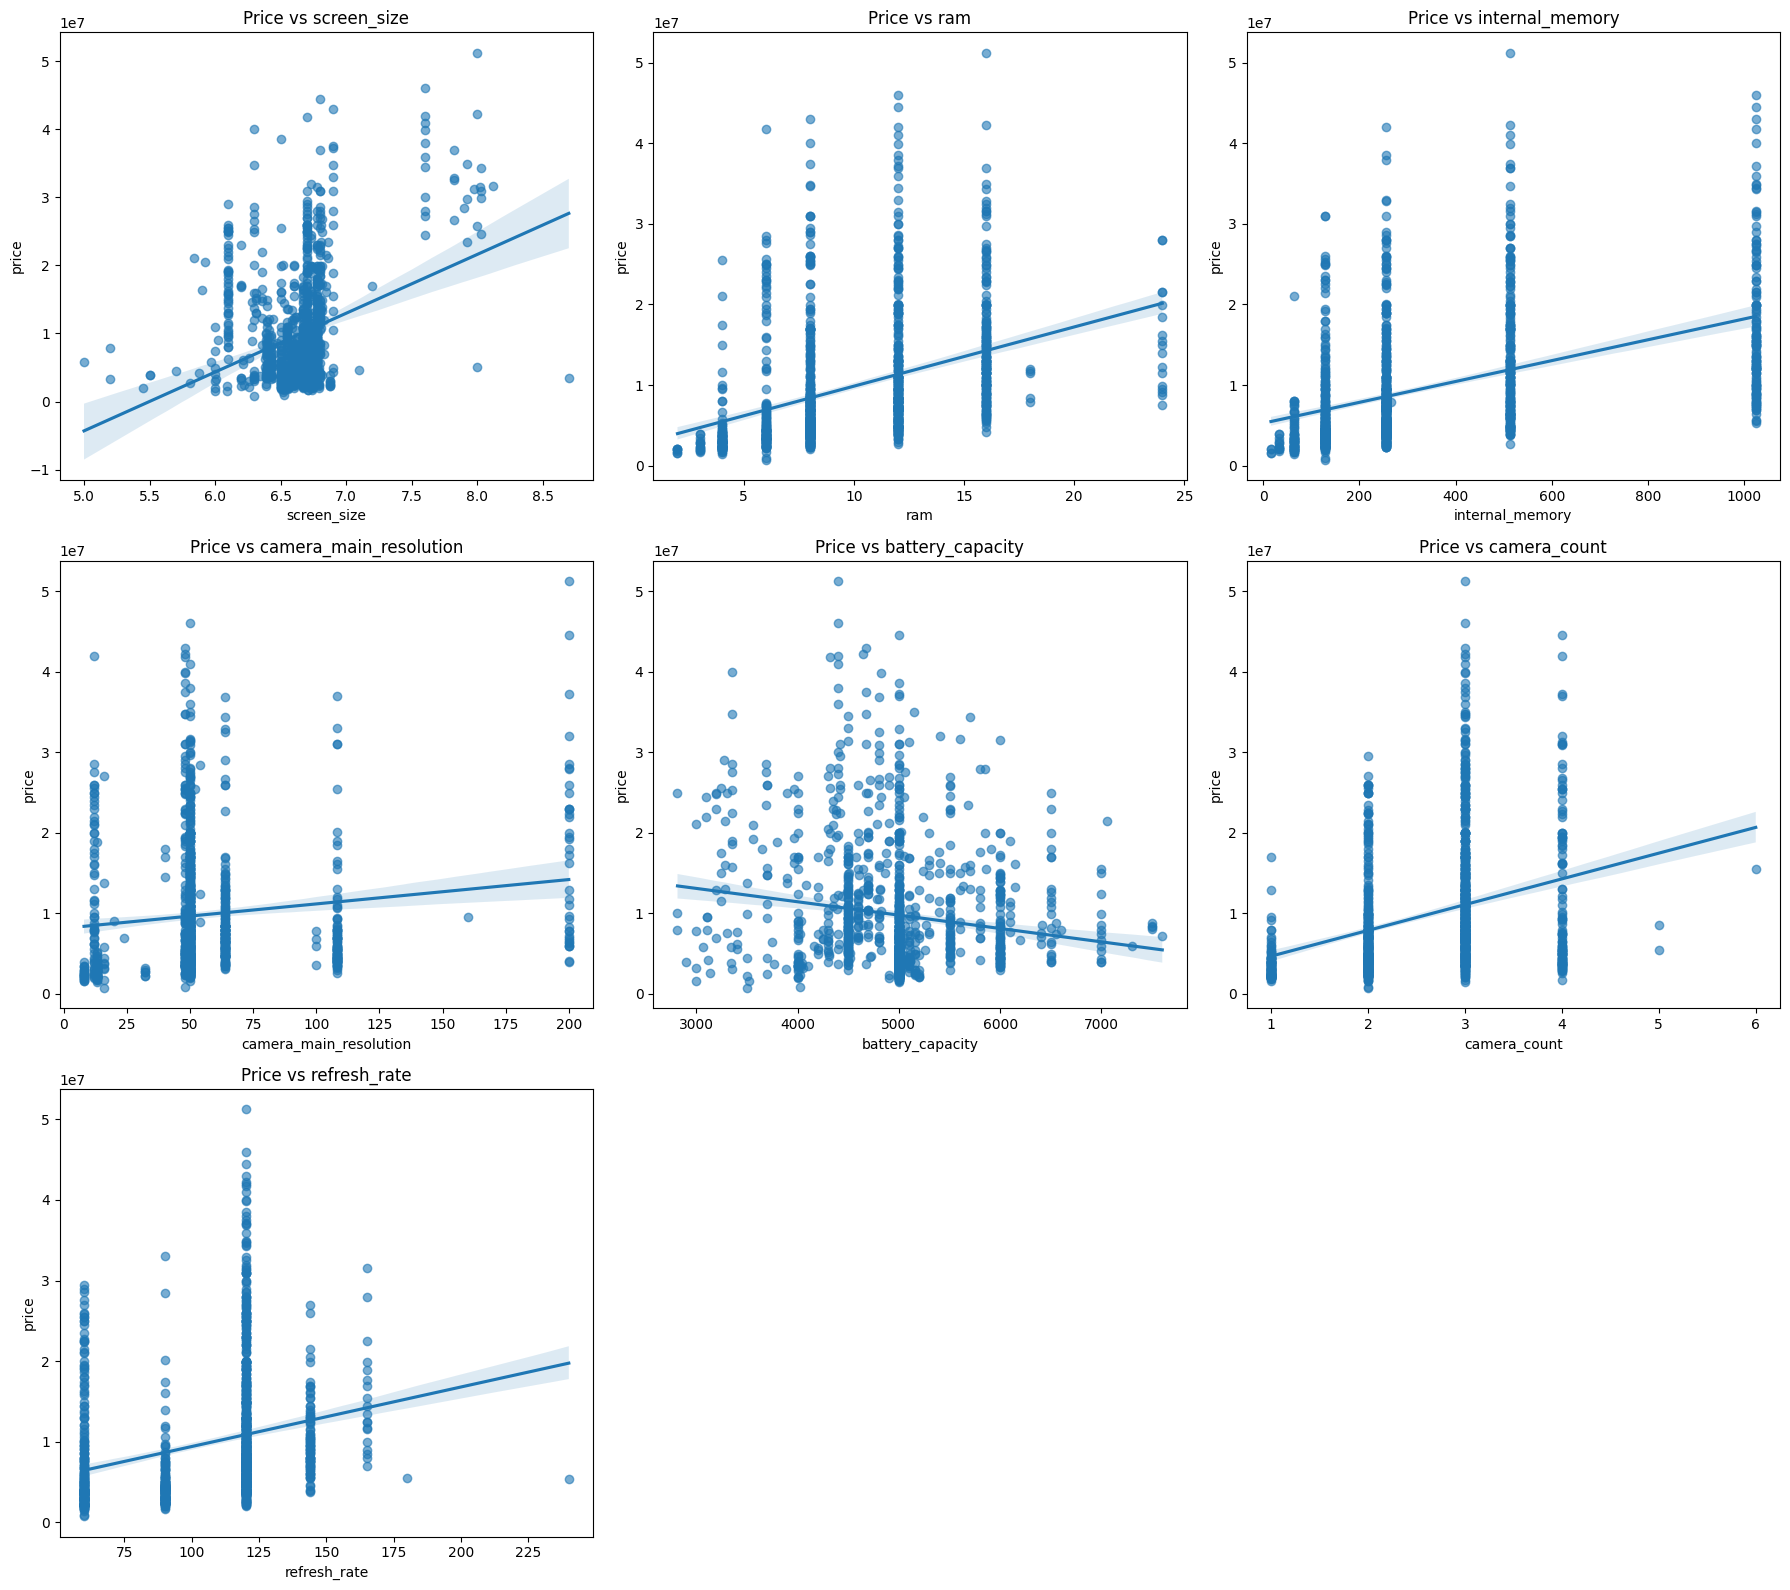

In [91]:
plt.figure(figsize=(18, 16))
for i, feature in enumerate(numeric_features[1:], 1):
    plt.subplot(3, 3, i)
    sns.regplot(x=feature, y='price', data=df, scatter_kws={'alpha':0.6})
    plt.title(f'Price vs {feature}')
plt.tight_layout()
plt.show()

Nhận xét:
1. Price vs screen_size
    - Xu hướng: Đường hồi quy dốc lên, thể hiện tương quan dương giữa kích thước màn hình và giá.

    - Giải thích: Điện thoại có màn hình lớn (thường thuộc phân khúc cao cấp) có xu hướng giá cao hơn. Tuy nhiên, có thể thấy vẫn có một số điểm nằm khá phân tán, nghĩa là không phải lúc nào màn hình lớn cũng đi kèm giá rất cao (vẫn phụ thuộc các yếu tố khác như cấu hình, thương hiệu).

2. Price vs ram
    - Xu hướng: Rõ ràng có tương quan dương khá mạnh. Khi RAM tăng, giá cũng tăng.

    - Giải thích: RAM thường là yếu tố được nâng cấp nhiều ở phân khúc cao cấp. Máy có RAM 8GB, 12GB hay thậm chí 16GB thường có giá cao hơn đáng kể so với máy 3GB hoặc 4GB.

3. Price vs internal_memory
    - Xu hướng: Đường hồi quy cũng dốc lên, cho thấy tương quan dương giữa dung lượng bộ nhớ trong và giá.

    - Giải thích: Bộ nhớ trong lớn (256GB, 512GB, 1TB, …) thường đi kèm máy cao cấp, kéo theo giá cao. Tuy nhiên, mức độ “tăng giá” có thể không mạnh như RAM, vì một số thương hiệu có thể tối ưu giá ở phân khúc trung cấp nhưng vẫn trang bị bộ nhớ trong tương đối lớn.

4. Price vs camera_main_resolution
    - Xu hướng: Tương quan dương, nhưng độ phân tán tương đối lớn. Có nhiều điểm rải rác trên toàn bộ vùng giá.

    - Giải thích: Độ phân giải camera chính cao (48MP, 64MP, 108MP, …) có xu hướng xuất hiện ở các máy giá cao hơn. Tuy vậy, không phải lúc nào camera độ phân giải cao cũng đắt, do còn phụ thuộc chất lượng cảm biến, công nghệ, thương hiệu, và các linh kiện khác.

5. Price vs. battery_capacity
    - Xu hướng: Có vẻ rất yếu hoặc gần như không có tương quan dương; thậm chí trong một số trường hợp, đường hồi quy có thể hơi dốc xuống (rất nhẹ).

    - Giải thích: Dung lượng pin không phải là yếu tố quyết định rõ ràng đến giá. Nhiều hãng sản xuất điện thoại tầm trung vẫn trang bị pin lớn (5000mAh, 6000mAh), trong khi điện thoại cao cấp đôi khi chỉ 4000-4500mAh nhưng có giá cao do tập trung vào màn hình, camera, chip, v.v. Do đó, pin không thể hiện mối quan hệ tuyến tính rõ với giá.

6. Price vs. camera_count
    - Xu hướng: Tương quan dương nhẹ (đường hồi quy đi lên), nhưng độ phân tán cũng khá cao.

    - Giải thích: Số camera (2, 3, 4, 5 camera) có thể tăng ở các dòng máy cao cấp, nhưng cũng có nhiều điện thoại tầm trung trang bị 3-4 camera. Chất lượng camera (camera_main_resolution, cảm biến, ống kính) quan trọng hơn số lượng camera trong việc định giá sản phẩm.
7. Price vs refresh_rate
    - Xu hướng: Có mối tương quan dương nhưng khá yếu. Khi tần số quét tăng, giá cũng có xu hướng tăng, nhưng mức độ ảnh hưởng không mạnh.

    - Giải thích: Tần số quét cao (120Hz, 144Hz, 240Hz) thường xuất hiện trên các sản phẩm cao cấp, đặc biệt là màn hình gaming hoặc flagship. Tuy nhiên, giá của một thiết bị không chỉ phụ thuộc vào tần số quét mà còn bị ảnh hưởng bởi các yếu tố khác như công nghệ hiển thị (OLED, IPS), kích thước màn hình và thương hiệu. 

### Box plot: Phân phối giá theo Brand

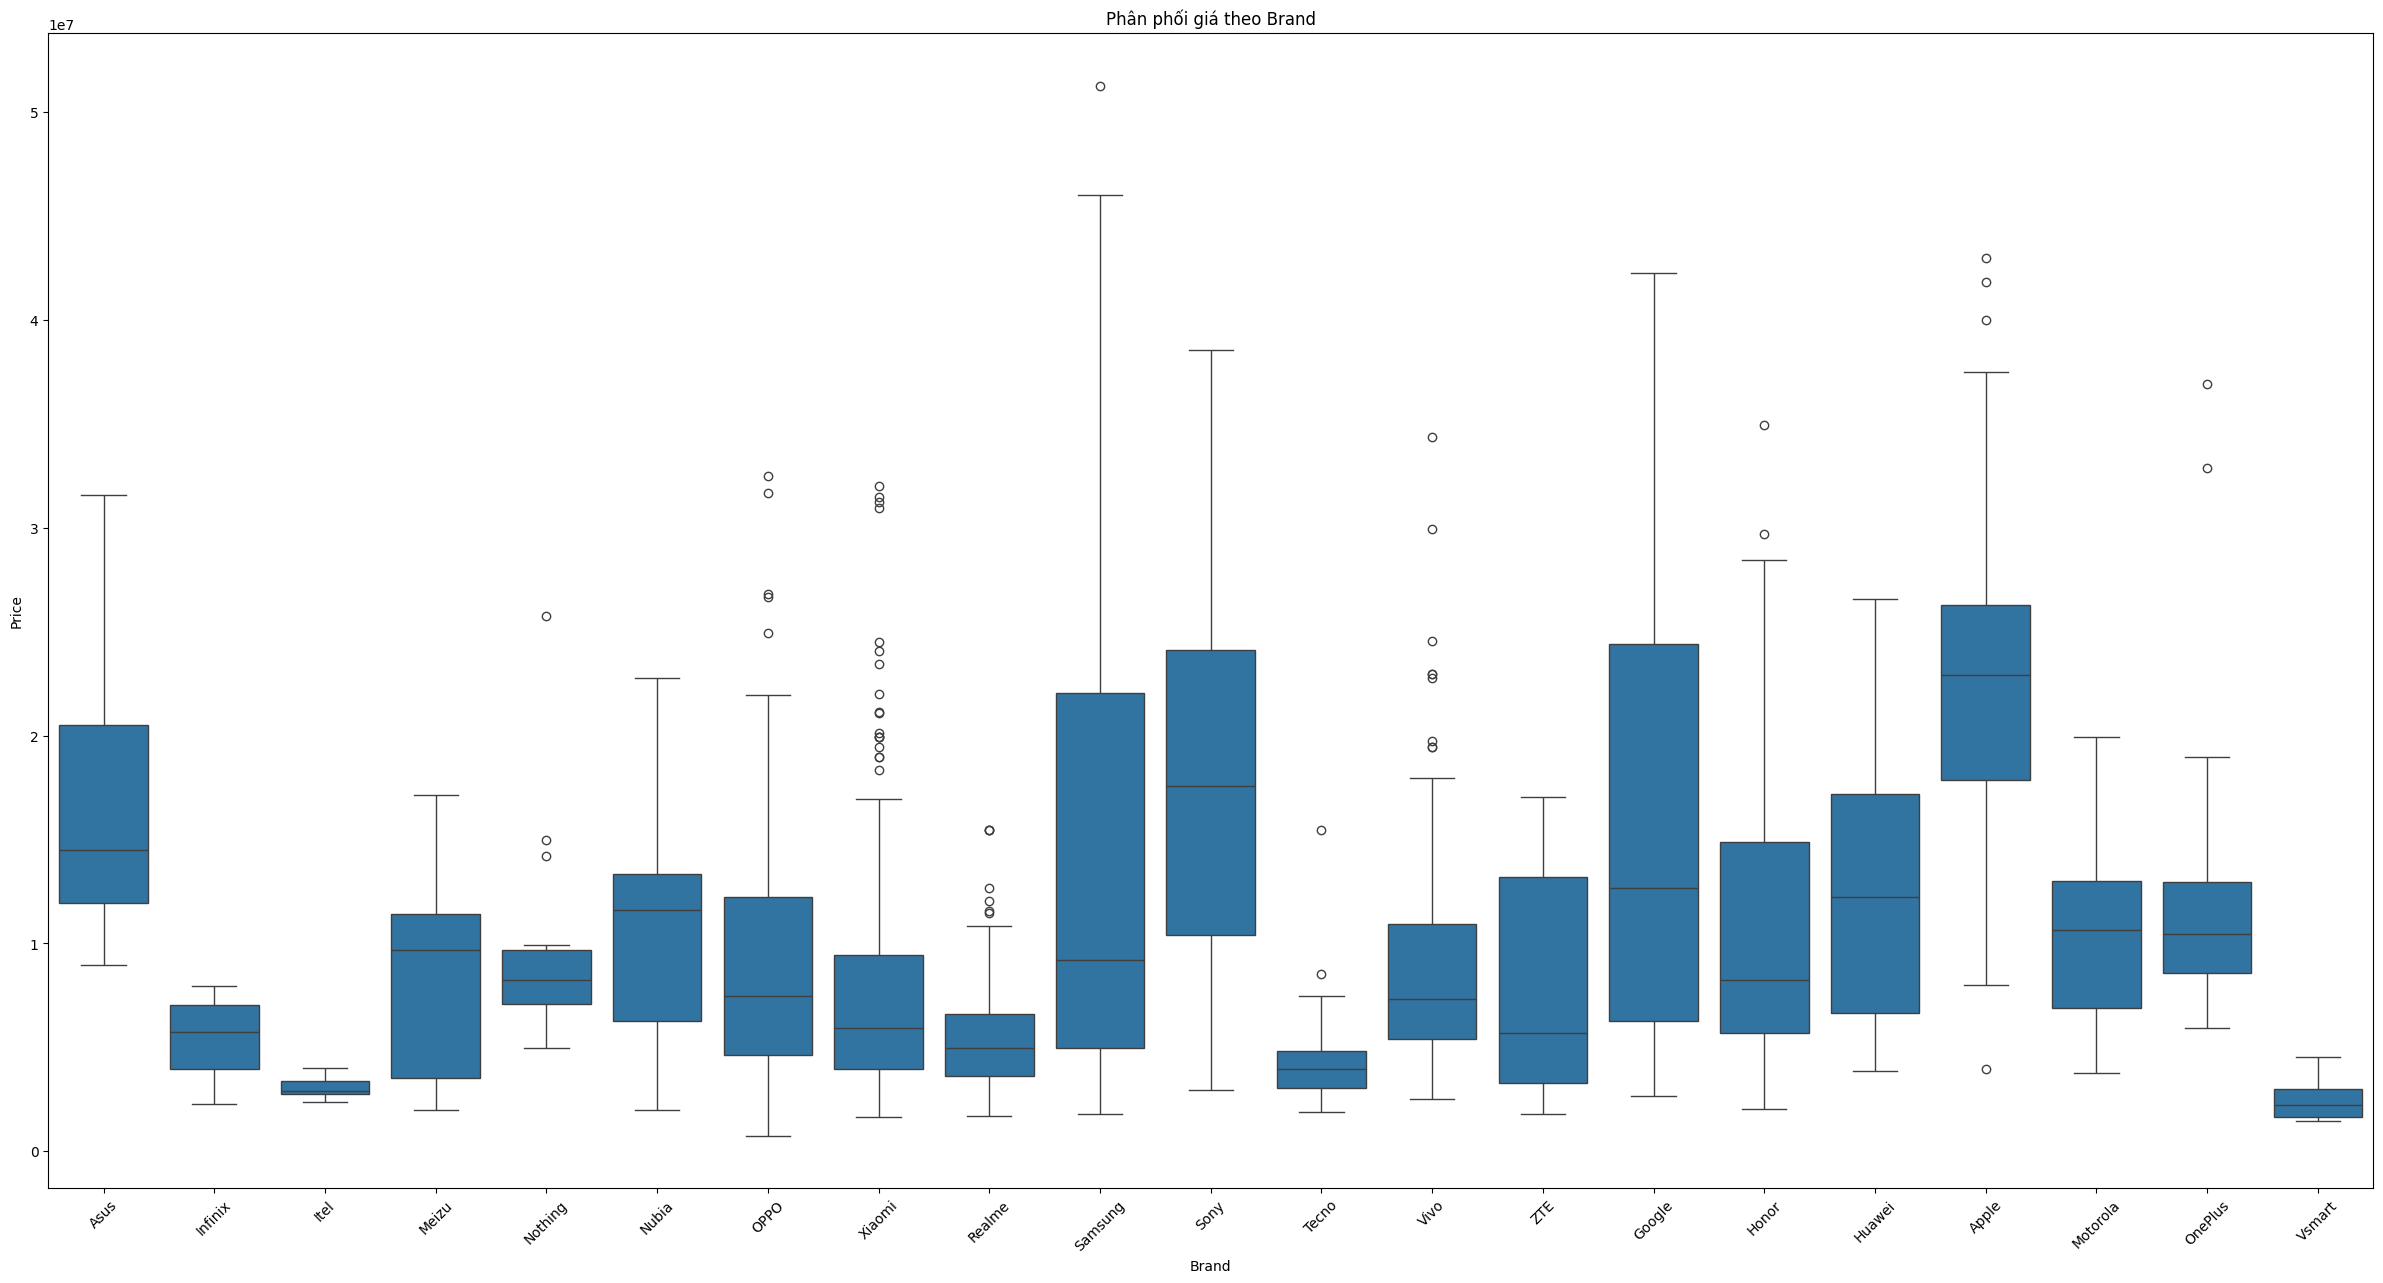

In [92]:

plt.figure(figsize=(30, 15))
sns.boxplot(x='brand', y='price', data=df)
plt.title("Phân phối giá theo Brand")
plt.xlabel("Brand")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

Nhận xét:
- Apple, Sony, Google, Samsung: Có mức giá trung bình cao nhất, phản ánh chiến lược tập trung vào phân khúc cao cấp. Giá trải rộng với nhiều outliers, cho thấy có các mẫu flagship đắt đỏ.

- Xiaomi, OPPO, Nokia, Huawei: Phạm vi giá rộng, bao phủ từ tầm trung đến cao cấp. Trung vị giá thấp hơn nhóm cao cấp, nhưng vẫn có một số mẫu giá cao.

- Infinix, Tecno, Itel, Walmart: Chủ yếu nhắm vào phân khúc giá rẻ, giá bán ổn định hơn, ít outliers.

- OnePlus, Realme, Motorola, Nothing: Nằm trong phân khúc tầm trung, với sự phân tán giá vừa phải.

- Điểm đáng chú ý: Các thương hiệu cao cấp có sự phân tán lớn, cho thấy nhiều dòng sản phẩm từ trung đến cao cấp, trong khi các thương hiệu giá rẻ có mức giá ít biến động hơn.

### Box plot: Phân phối giá theo top 30 Chip_model phổ biến nhất

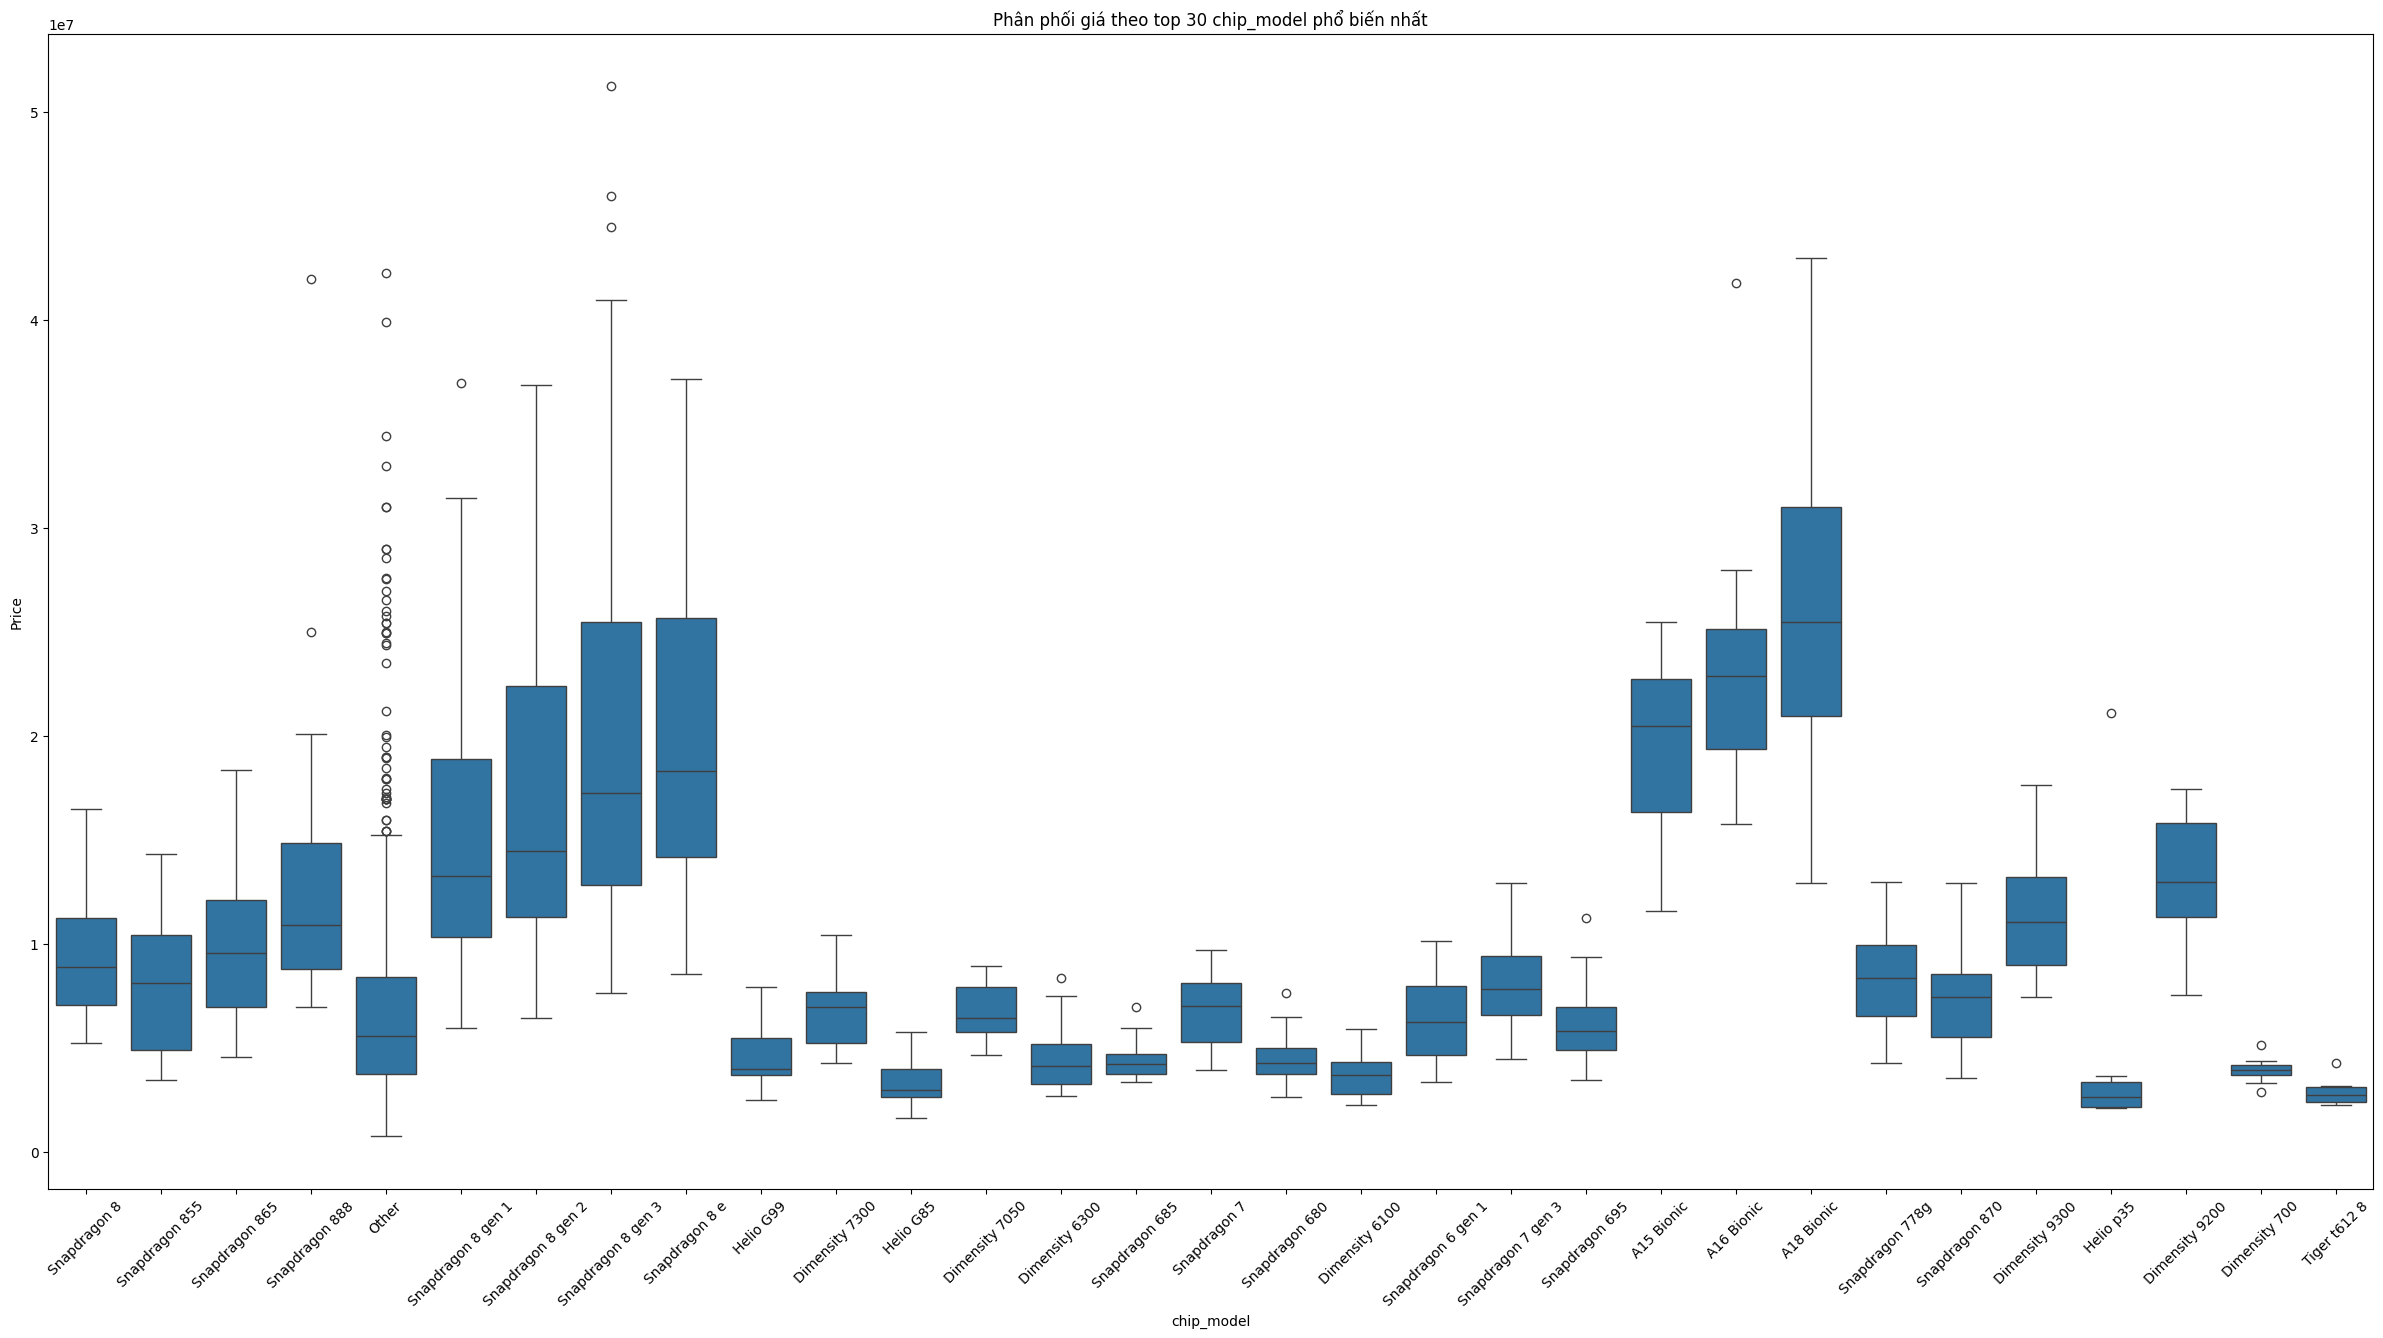

In [93]:

# Xử lý biến danh mục 'chip_model': giữ top 30, gộp các giá trị khác thành "Other"
top_chip_model = df['chip_model'].value_counts().nlargest(30).index
df['chip_model_group'] = df['chip_model'].apply(lambda x: x if x in top_chip_model else 'Other')

# Vẽ Box Plot cho giá theo chip_model
plt.figure(figsize=(30, 15))
sns.boxplot(x='chip_model_group', y='price', data=df)
plt.title("Phân phối giá theo top 30 chip_model phổ biến nhất")
plt.xlabel("chip_model")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

Nhận xét: 
- Chip cao cấp:

    - Apple A15, A16 Bionic, Snapdragon 8 Gen 1, 8 Gen 2, 8 Gen 3 có mức giá trung bình cao nhất, với phạm vi giá rộng và nhiều outliers, phản ánh việc chúng được sử dụng trong các flagship đắt đỏ.

    - Snapdragon 8 Gen 1 có nhiều điểm dữ liệu phân tán, cho thấy sự đa dạng về giá giữa các thiết bị sử dụng con chip này.

- Chip tầm trung:

    - Snapdragon 778G, 870, Dimensity 930, 920, 8100 có mức giá tầm trung với độ phân tán vừa phải, thể hiện sự phổ biến trong các thiết bị cận cao cấp.

    - Dimensity 7050, Snapdragon 7 Gen 1 có phạm vi giá ổn định hơn, phản ánh thị trường tầm trung cân bằng.

- Chip giá rẻ:

    - Helio P35, Dimensity 700, Tiger T612 có mức giá thấp và ổn định, ít outliers, phù hợp với phân khúc điện thoại giá rẻ.

    - Snapdragon 680, 695, 662 cũng thuộc nhóm giá rẻ đến tầm trung, nhưng có độ phân tán lớn hơn do được dùng trong nhiều dòng máy khác nhau.

### Box plot: Phân phối giá theo top 20 Screen Tech phổ biến nhất

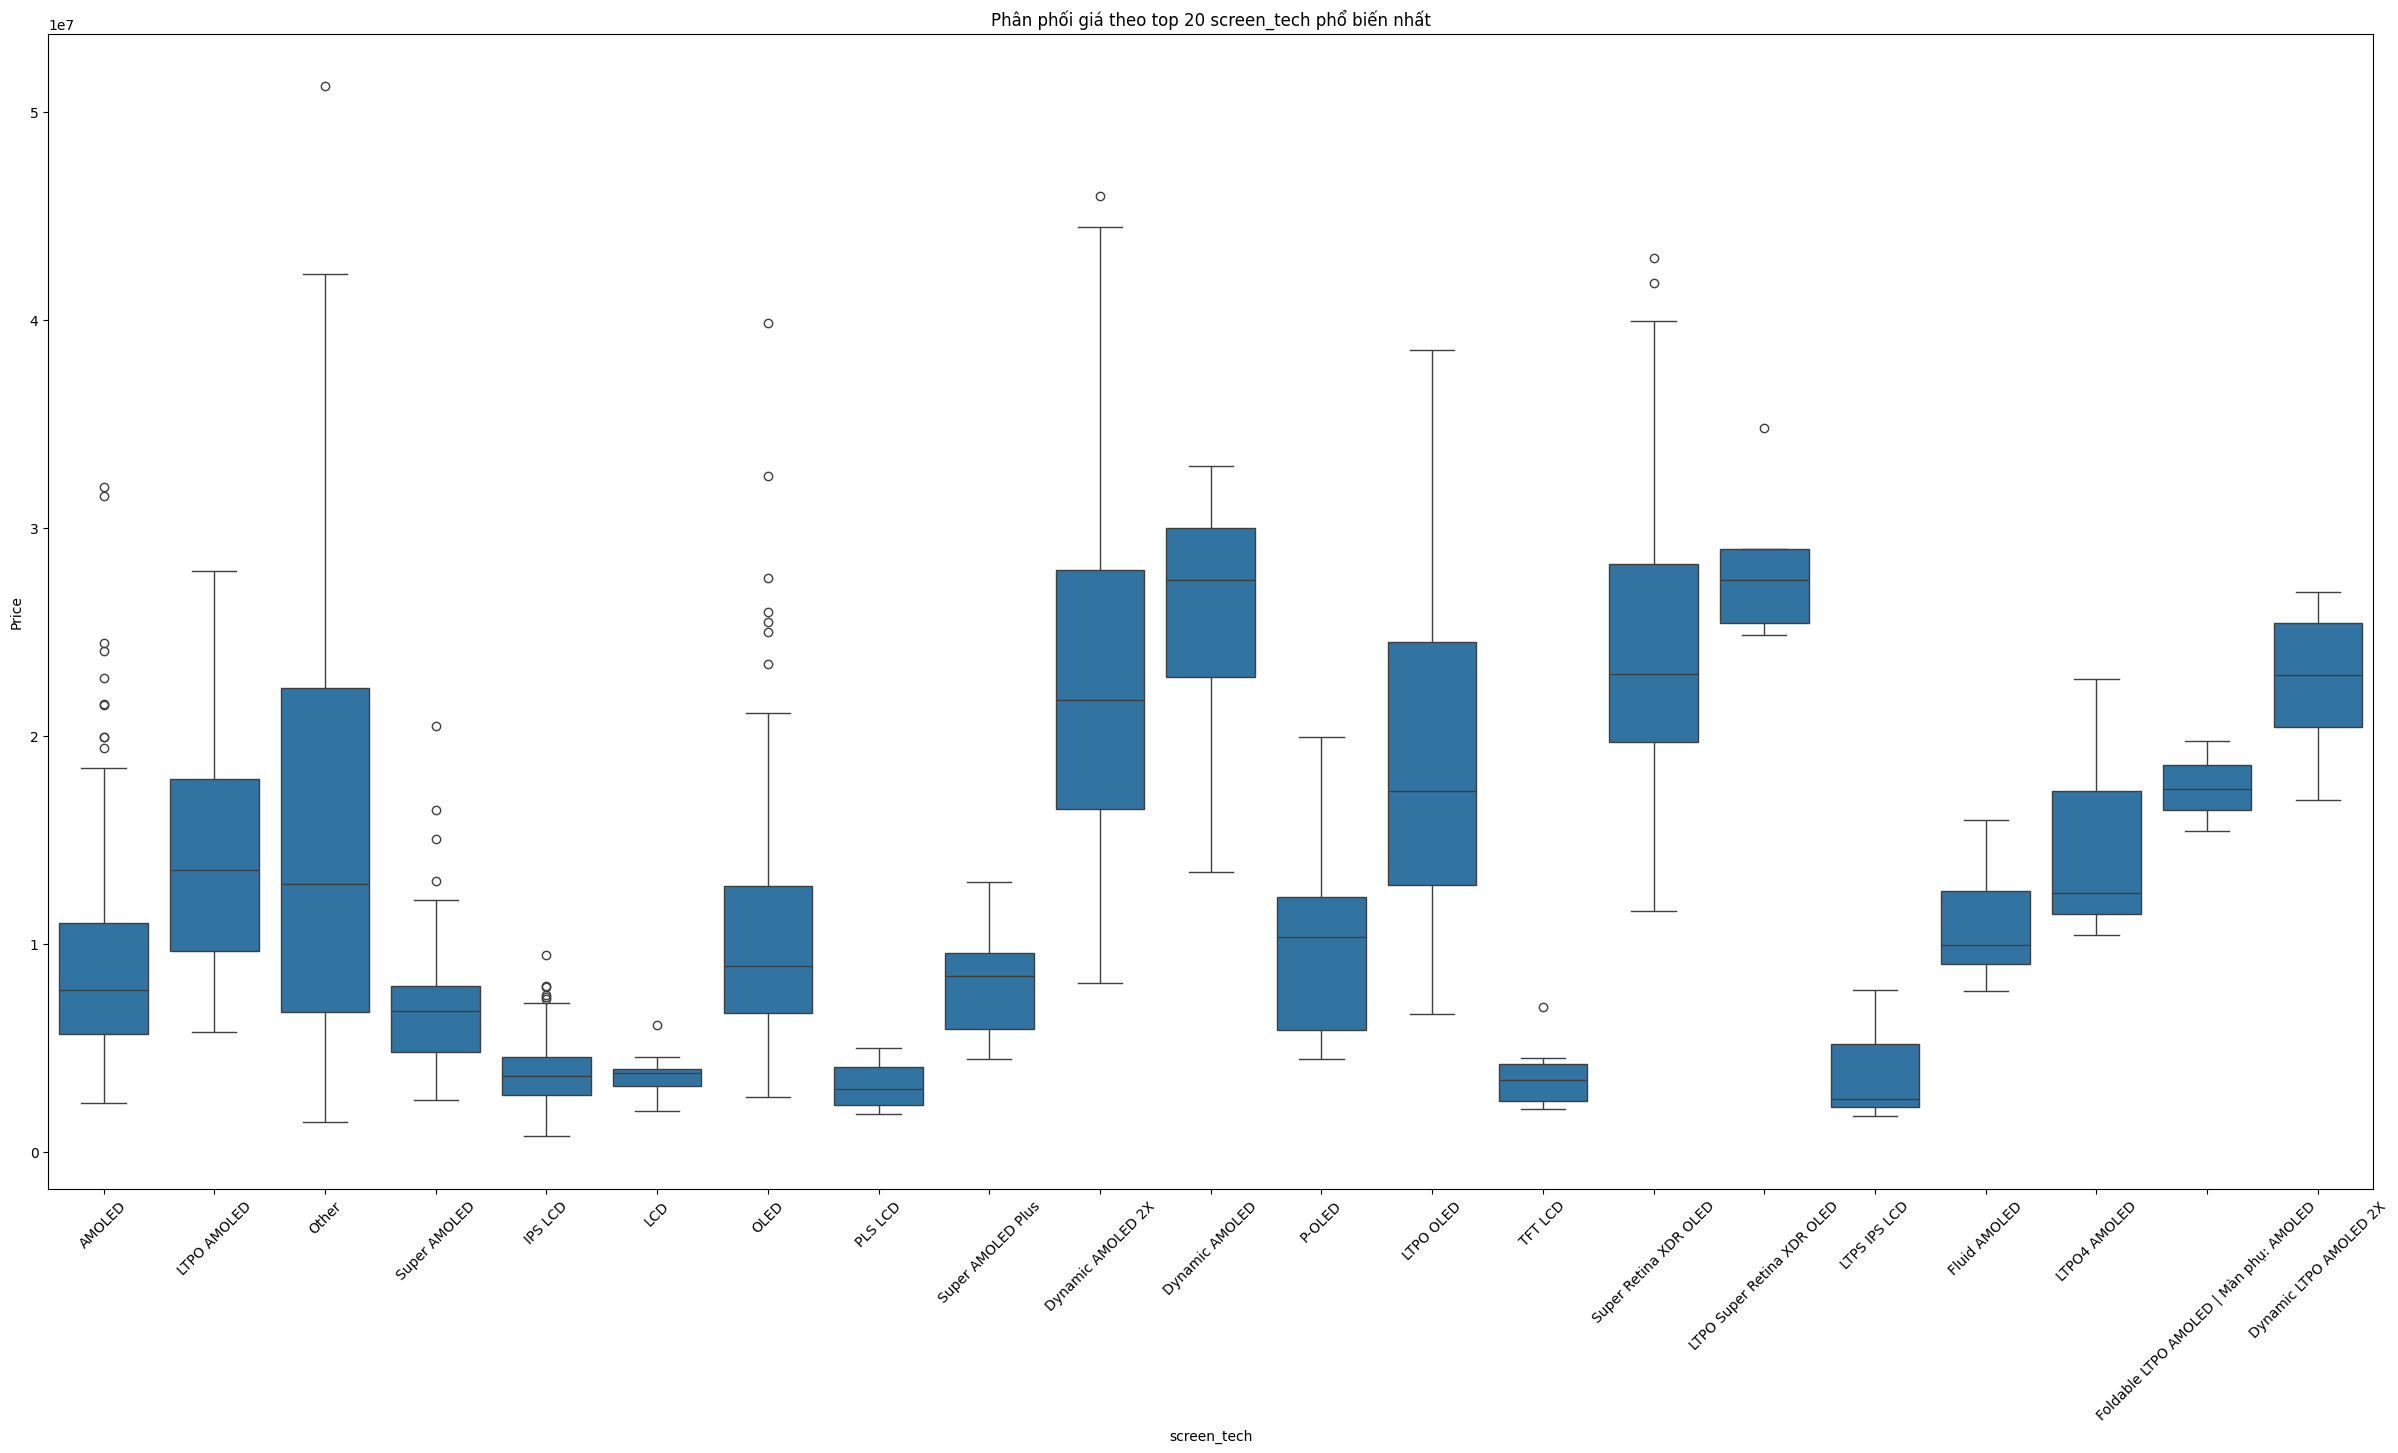

In [151]:
# Xử lý biến danh mục 'screen_tech': giữ top 20, gộp các giá trị khác thành "Other"
top_screen_tech = df['screen_tech'].value_counts().nlargest(20).index
df['screen_tech_group'] = df['screen_tech'].apply(lambda x: x if x in top_screen_tech else 'Other')

# Vẽ Box Plot cho giá theo screen_tech
plt.figure(figsize=(30, 15))
sns.boxplot(x='screen_tech_group', y='price', data=df)
plt.title("Phân phối giá theo top 20 screen_tech phổ biến nhất")
plt.xlabel("screen_tech")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

Nhận xét:
- Màn hình cao cấp:

    - Dynamic AMOLED 2X, LTPO AMOLED, Foldable LTPO AMOLED có giá trung bình cao nhất, với phạm vi giá rộng và ít thiết bị giá rẻ.

    - Super Retina XDR OLED, LTPO Super Retina XDR OLED cũng thuộc nhóm đắt đỏ, chủ yếu xuất hiện trên các flagship của Apple.

- Màn hình tầm trung:

    - AMOLED, Super AMOLED, P-OLED, Fluid AMOLED có mức giá trung bình và độ phân tán rộng, phản ánh việc các công nghệ này được dùng trong cả dòng máy tầm trung lẫn cận cao cấp.

- Màn hình giá rẻ:

    - IPS LCD, PLS LCD, TFT LCD có giá thấp nhất, với phạm vi giá ổn định, phù hợp với phân khúc điện thoại phổ thông.

### Box plot: Phân phối giá theo screen_resolution_k

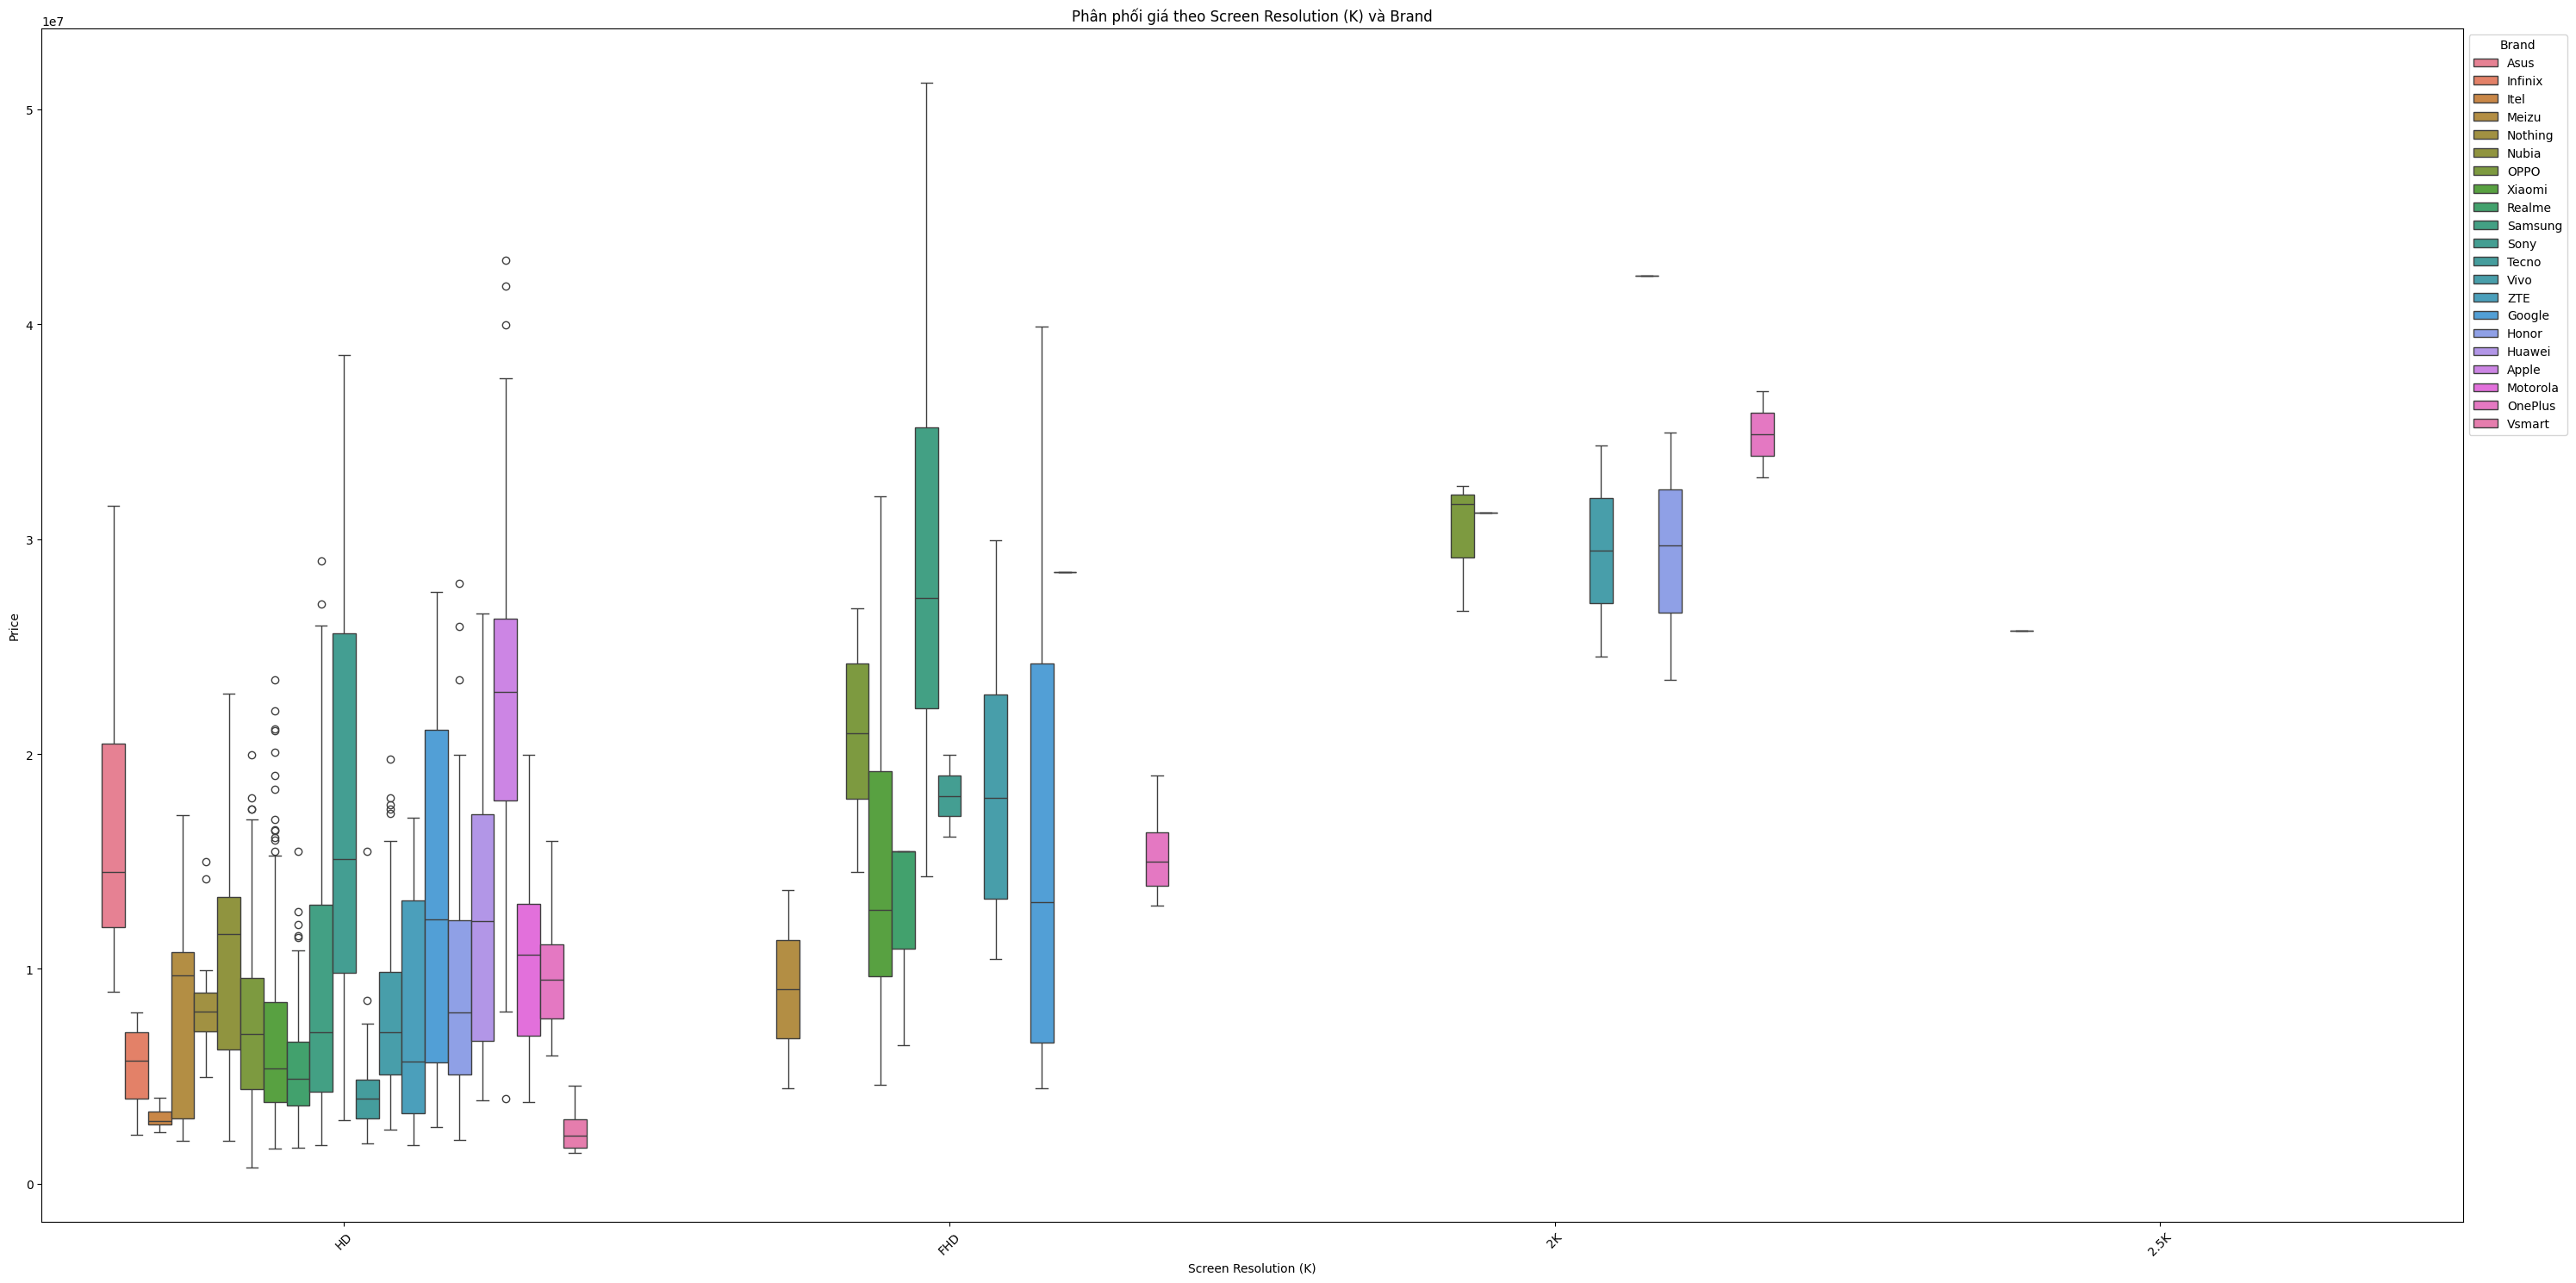

In [104]:
plt.figure(figsize=(30, 15))
sns.boxplot(data=df, x="screen_resolution_k", y="price", hue="brand")
# plt.yscale("log")  # Sử dụng log scale cho trục y nếu giá có độ chênh lệch lớn
plt.xlabel("Screen Resolution (K)")
plt.ylabel("Price")
plt.title("Phân phối giá theo Screen Resolution (K) và Brand")
plt.xticks(rotation=45)
plt.legend(title="Brand", bbox_to_anchor=(1, 1), loc="upper left")
plt.tight_layout()
plt.show()

### Cluster Map: Nhóm dữ liệu có đặc điểm giống nhau

<Figure size 1200x800 with 0 Axes>

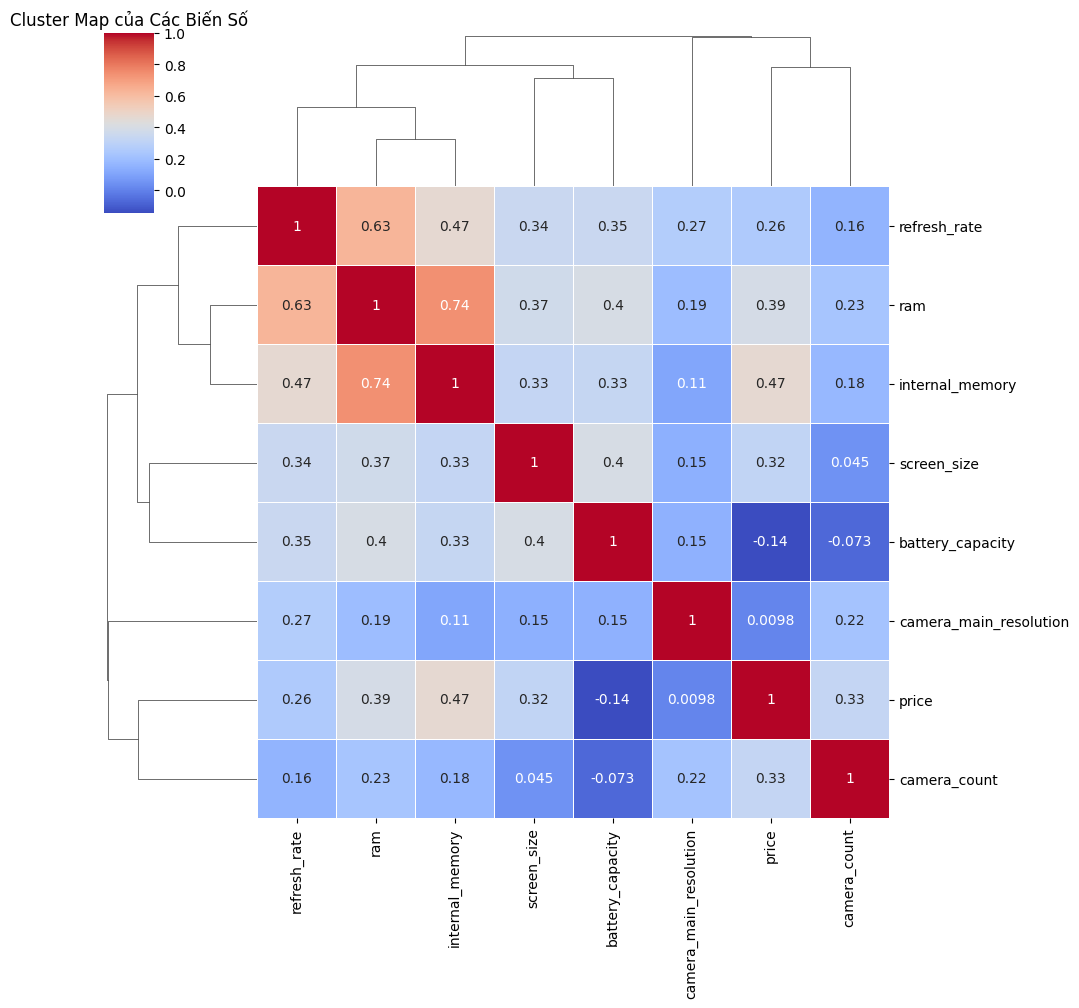

In [80]:
plt.figure(figsize=(12, 8))
sns.clustermap(df[numeric_features].corr(), cmap="coolwarm", annot=True, linewidths=0.5)
plt.title("Cluster Map của Các Biến Số")
plt.show()


## Trực quan hóa không gian nhiều chiều bằng t-SNE

### Chuẩn bị dữ liệu

In [122]:
features_for_tsne = numeric_features
df_tsne = df.dropna(subset=features_for_tsne).copy()

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
df_tsne_scaled = scaler.fit_transform(df_tsne[features_for_tsne])


### Áp dụng t-SNE

In [123]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_results = tsne.fit_transform(df_tsne_scaled)

df_tsne[['tsne_1', 'tsne_2']] = tsne_results


### Vẽ Scatter Plot của t-SNE

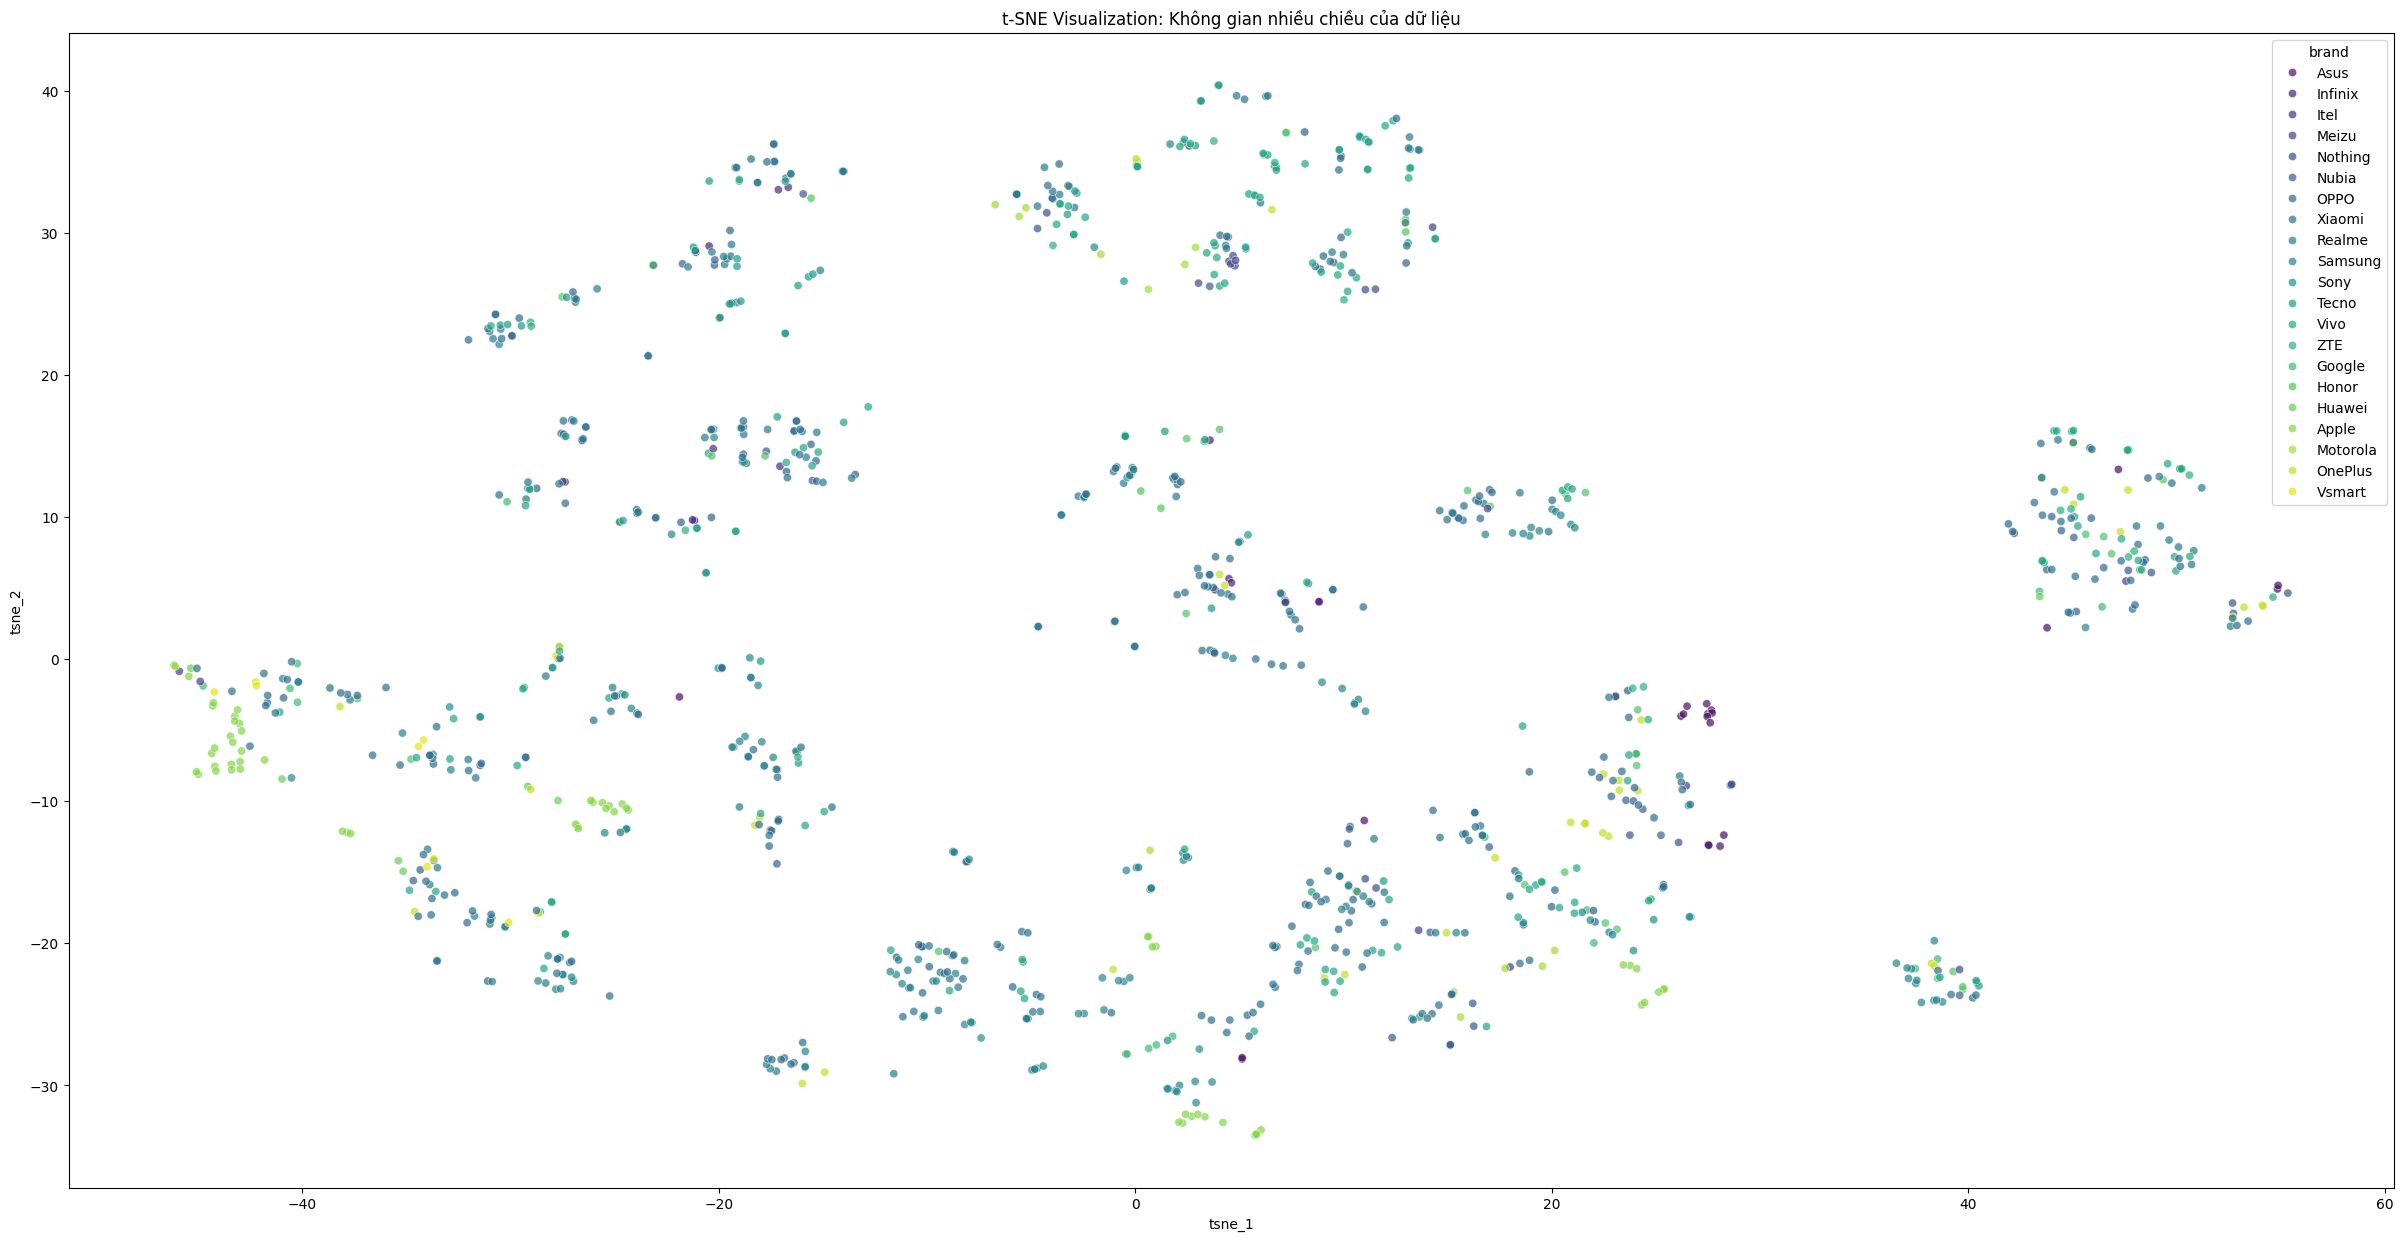

In [153]:
plt.figure(figsize=(30, 15))
sns.scatterplot(data=df_tsne, x='tsne_1', y='tsne_2', hue='brand', palette='viridis', alpha=0.7)
plt.title("t-SNE Visualization: Không gian nhiều chiều của dữ liệu")
plt.show()


Nhận xét: Dữ liệu có tính chất phân cụm